# Laboratory Session - Exercise 05

 **Alice Pagano** - 1236916 
 
 *Padova, 20 May 2020*

In [1]:
# Import libraries
library(repr) # Library for plot size in jupyter
library(dplyr) # Library for operators
library(latex2exp) # Library for latex text
library(GoFKernel) # Library for the inverse function


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


# Index <a class="anchor" id="0"></a>

1. [Exercise 1 - Market survey](#1) <br>    
2. [Exercise 2 - Bulding of a new concert hall](#2) <br> 
3. [Exercise 3 - Flip of a coin](#3) <br>

## Exercise 1 - Market survey <a class="anchor" id="1"></a>
* [Index](#0)

A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.

### A) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?

We suppose that a random sample people is selected. In particular, in a simple random sample every possible person on the sample of a given size has an equal probability of selection. Hence, the appropiate **Likelihood** is the **binomial distribution**.

* $y$ = number of people in the sample who read the journal

* $n$ = length of the sample

* $p$ = probability that a person reads the journal

* $M$ = measurement model

The Likelihood distribution is:
$$
P(y|p,n,M) = \begin{pmatrix} n \\ y \end{pmatrix} p^y (1-p)^{n-y} \quad \text{with } y \le n
$$

### B) Assuming a uniform prior, what is the posterior distribution for y ?

Now, let us suppose a **uniform Prior**: $ P(p|M) \sim U(0,1) $.

The **Posterior** density distribution is simply proportional to the Likelihood:

$$
P(p|y,n,M) = \frac{1}{Z} p^y (1-p)^{n-y} = \frac{1}{Z} P^* (p|y,n,M)
$$

where $Z$ is the normalization factor (i.e. the **evidence** P(y|n,M)).

### C) Plot both Posterior and Likelihood distributions functions

Let us plot the Likelihood for different value of probability, to see how it changes by chaning its value.

In [2]:
n <- 150 
y <- 29

x <- seq(0, 150, 1)

# Likelihood for different value of probability
p.like1 <- dbinom(x=x, size=n, prob=29/150)
p.like2 <- dbinom(x=x, size=n, prob=1/3)
p.like3 <- dbinom(x=x, size=n, prob=1/2)

# Compute the Posterior
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

p.star <- dbinom(x=y, size=n, prob=p)
#Normalized Posterior
p.post.norm <- p.star/(delta.p*sum(p.star))

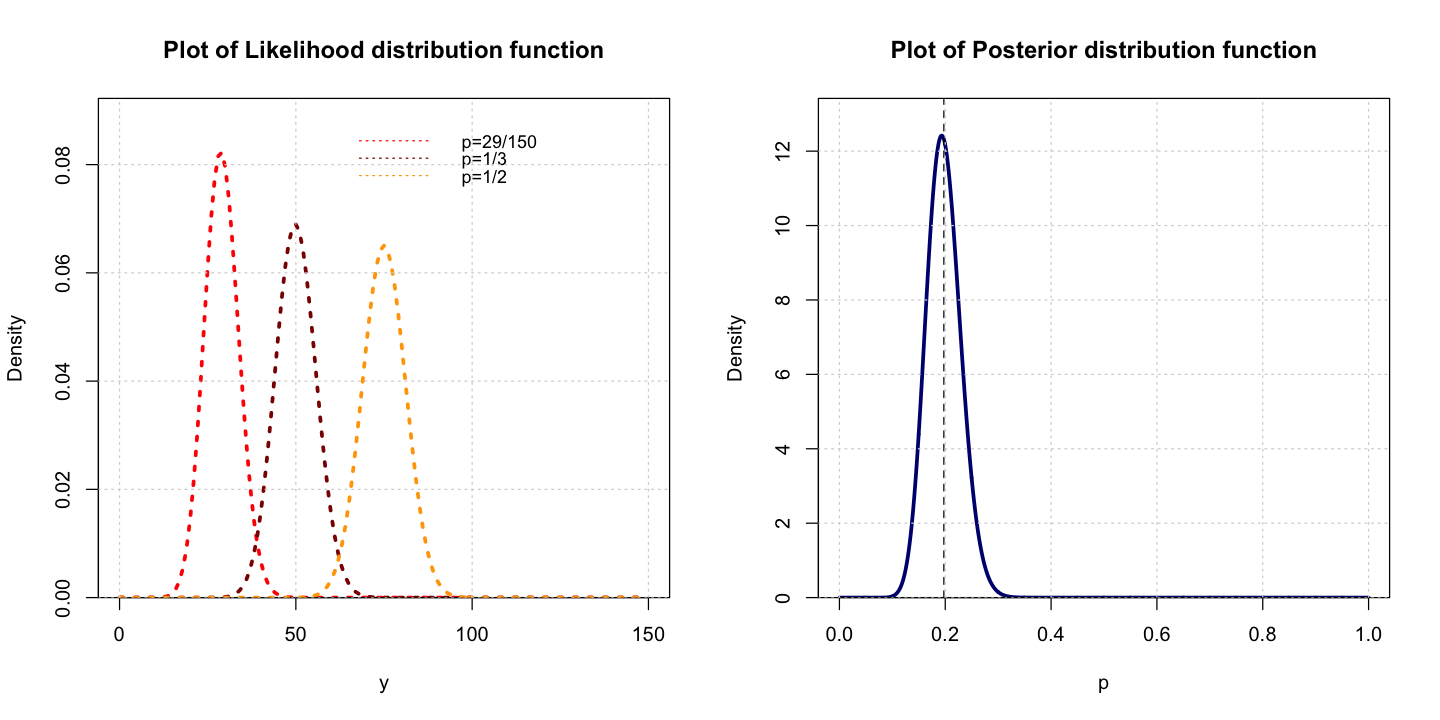

In [3]:
# Plot of Likelihood and Posterior distributions functions

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(x, p.like1, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,max(p.like1)+0.01),
     main = "Plot of Likelihood distribution function", lty=3, lwd = 3, xlab="y", 
     ylab='Density')
lines(x, p.like2, xaxs='r', yaxs='i', col='darkred', type='l', ylim=c(0,max(p.like2)+0.01),
     main = "Plot of Likelihood distribution function", lty=3, lwd = 3, xlab="y", 
     ylab='Density')
lines(x, p.like3, xaxs='r', yaxs='i', col='orange', type='l', ylim=c(0,max(p.like3)+0.01),
     main = "Plot of Likelihood distribution function", lty=3, lwd = 3, xlab="y", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("p=29/150","p=1/3","p=1/2"),
       col=c("red", "darkred","orange"), lty=3:3:3, cex=0.9,
       box.lty=0)
grid()

plot(p, p.post.norm, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(p.post.norm)+1),
     main = "Plot of Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
p.mean <- delta.p*sum(p*p.post.norm)
abline(v=p.mean, lty=2,col='black')
grid()

## Exercise 2 - Bulding of a new concert hall <a class="anchor" id="2"></a>
* [Index](#0)

Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.

**Anna** thinks that her prior is a **beta distribution** with mean 0.2 and a standard deviation of 0.08. Hence, the parameter of the beta distribution are:

$$
\alpha =   \mu   \Big(\frac{\mu*(1-\mu)}{sd^2} - 1\Big)\\
\beta  = (1-\mu)  \Big(\frac{\mu*(1-\mu)}{sd^2} - 1\Big)
$$

**Benny** moved only recently to this new town and therefore he does non have the slightest idea about
it. Therefore he decides to use a **uniform prior**.

**Chris** believes that his prior should have a **trapezoidal shape**:

$$
f(X) = \begin{cases} 20x & 0 \le x < 0.1 \\ 2 & 0.1 \le x < 0.3 \\ 5-10x & 0.3 \le x < 0.5 \\ 0 & x \ge 0.5 \end{cases}
$$

### A) Draw and compare the three prior distributions.

In [4]:
# Anna Prior
mu <- 0.2
sd <- 0.08 

alpha.prior <-    mu  * (mu*(1-mu)/sd^2 - 1)
beta.prior  <- (1-mu) * (mu*(1-mu)/sd^2 - 1)

n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 

anna.prior <- dbeta(x=p, alpha.prior, beta.prior)

# Benny Prior
benny.prior <- dunif(x=p)

# Chris Prior
func <- Vectorize( function(x){
        if(0 <= x & x< 0.1){X <- 20*x}
        if(0.1 <= x & x< 0.3){X <- 2}
        if(0.3 <= x & x< 0.5){X <- 5-10*x}
        if(x >= 0.5){X <- 0}
        return(X)
        })
chris.prior <- func(p)

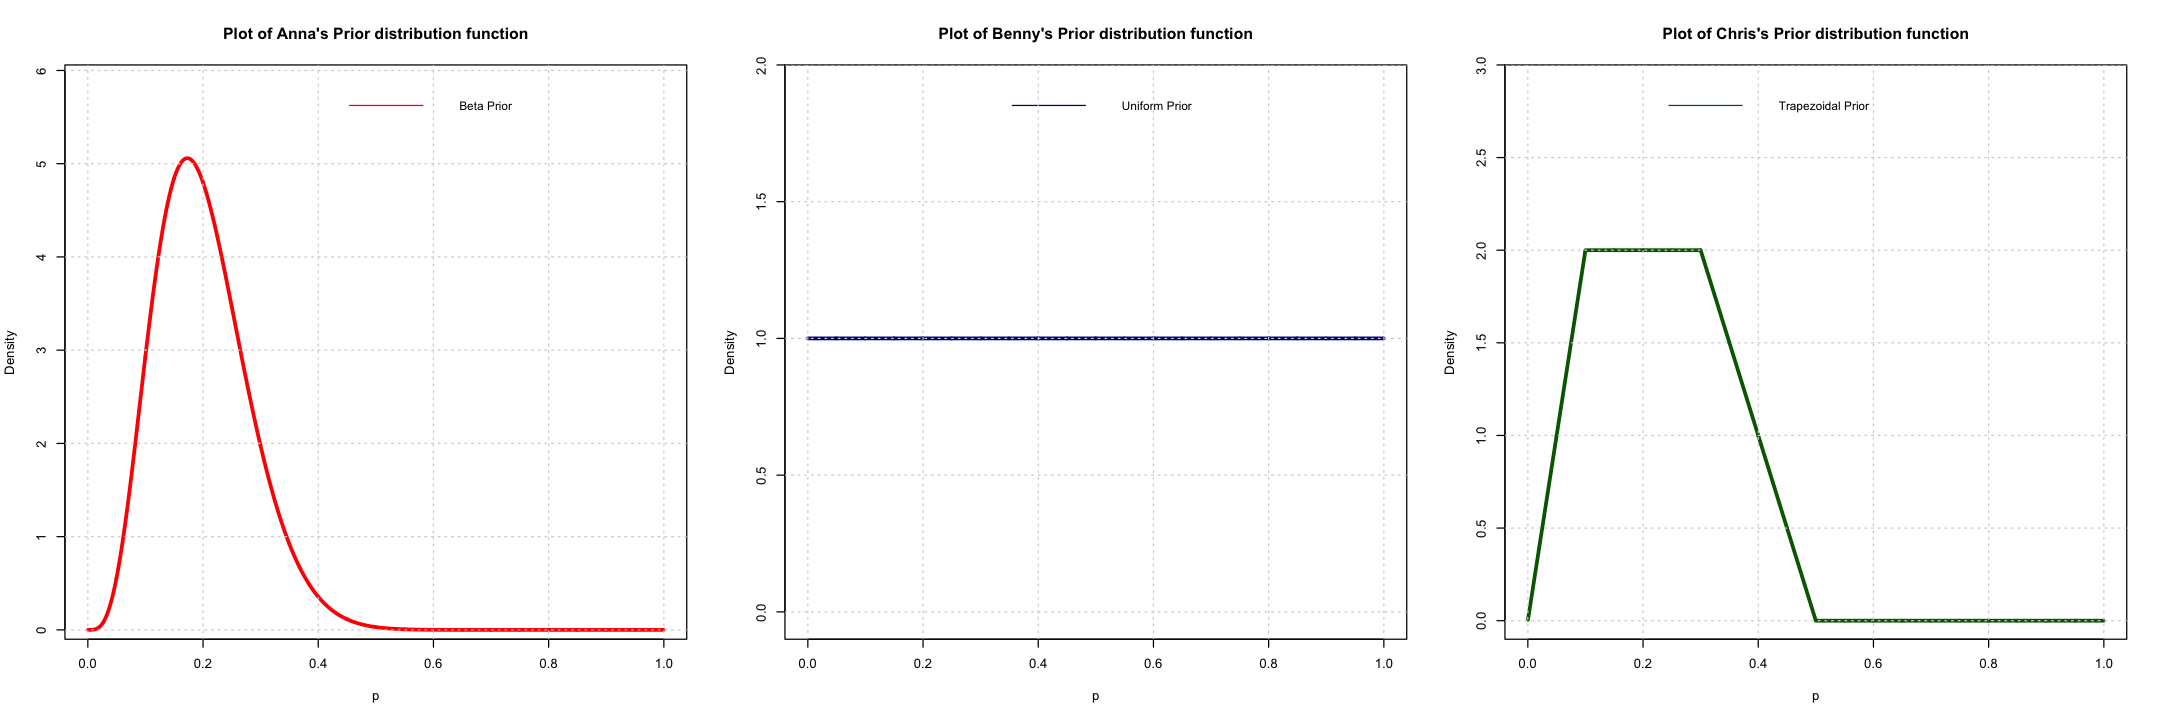

In [5]:
# set the size and position of the plots
par(mfrow=c(1,3))
options(repr.plot.width=18, repr.plot.height=6)

plot(p, anna.prior, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0-0.1,max(anna.prior)+1),
     main = "Plot of Anna's Prior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Beta Prior"), col=c("red"), lty=1, cex=0.9,box.lty=0)
grid()
plot(p, benny.prior, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0-0.1,max(benny.prior)+1),
     main = "Plot of Benny's Prior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Uniform Prior"), col=c("navy"), lty=1, cex=0.9,box.lty=0)
grid()
plot(p, chris.prior, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0-0.1,max(chris.prior)+1),
     main = "Plot of Chris's Prior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Trapezoidal Prior"), col=c("darkgreen"), lty=1, cex=0.9,box.lty=0)
grid()

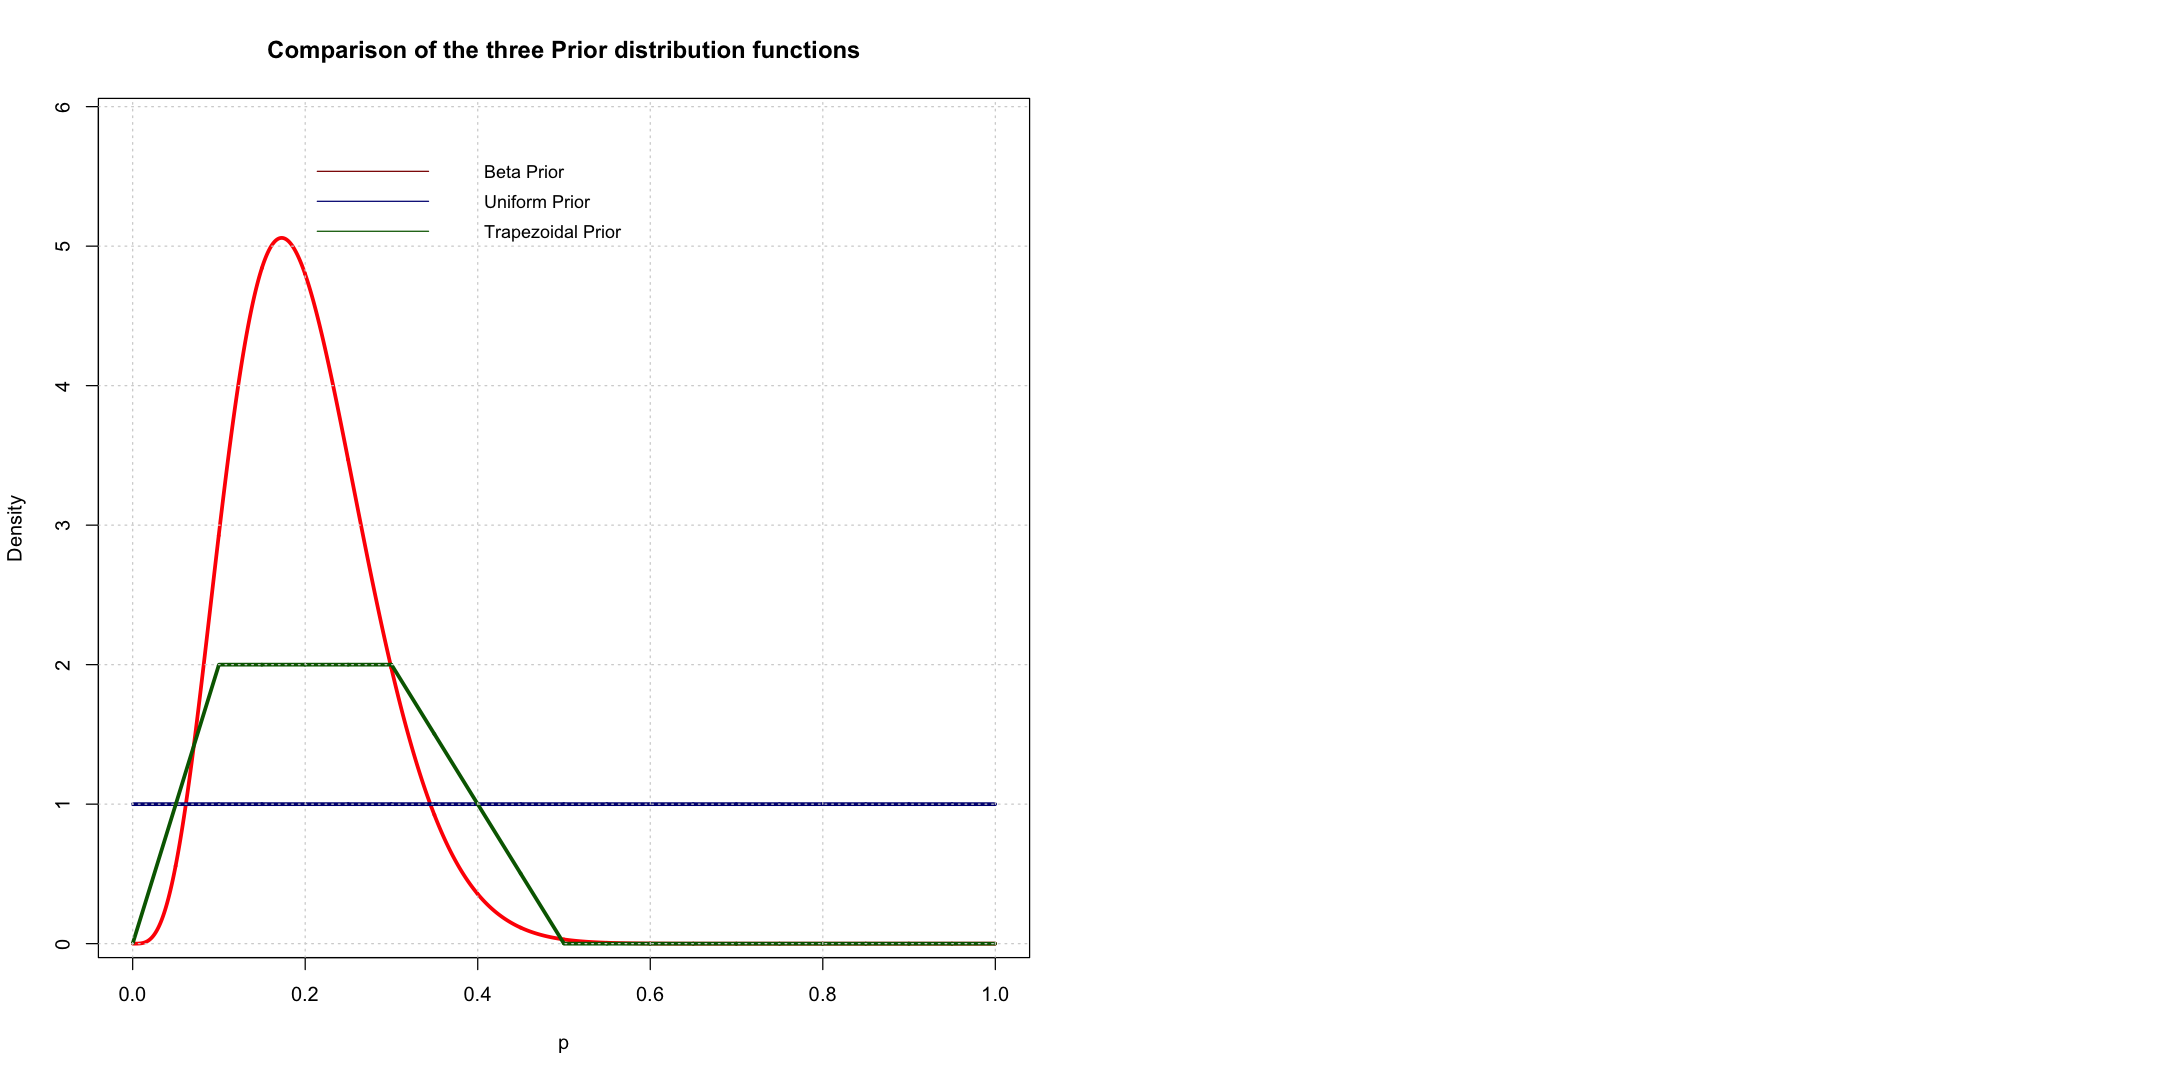

In [6]:
# Plot in the same graph

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=18, repr.plot.height=9)

plot(p, anna.prior, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0-0.1,max(anna.prior)+1),
     main = "Comparison of the three Prior distribution functions", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, benny.prior, col='navy', type='l', lty=1, lwd = 3)
lines(p, chris.prior, col='darkgreen', type='l', lty=1, lwd = 3)

legend("topright", inset=0.05,legend=c("Beta Prior","Uniform Prior","Trapezoidal Prior"), col=c("darkred","navy","darkgreen"), lty=1, cex=0.9,box.lty=0)
grid()

The next day the three students decide to interview a sample of 100 citizens of the small town, asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert hall.

### B) Evaluate and draw the three posterior distributions.

Let us consider a **binomial distribution** for the **Likelihood**. Then, the **Posterior** is:

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior} 
$$

In [7]:
n <- 100
y <- 26

# Compute the Posterior for Beta Prior (Anna's Prior)
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

p.star <- dbinom(x=y, size=n, prob=p)*anna.prior
#Normalized Posterior
anna.post.norm <- p.star/(delta.p*sum(p.star))



# Compute the Posterior for Uniform Prior (Benny's Prior)
p.star <- dbinom(x=y, size=n, prob=p)*benny.prior
#Normalized Posterior
benny.post.norm <- p.star/(delta.p*sum(p.star))



# Compute the Posterior for Trapezoidal Prior (Chris's Prior)
p.star <- dbinom(x=y, size=n, prob=p)*chris.prior
#Normalized Posterior
chris.post.norm <- p.star/(delta.p*sum(p.star))

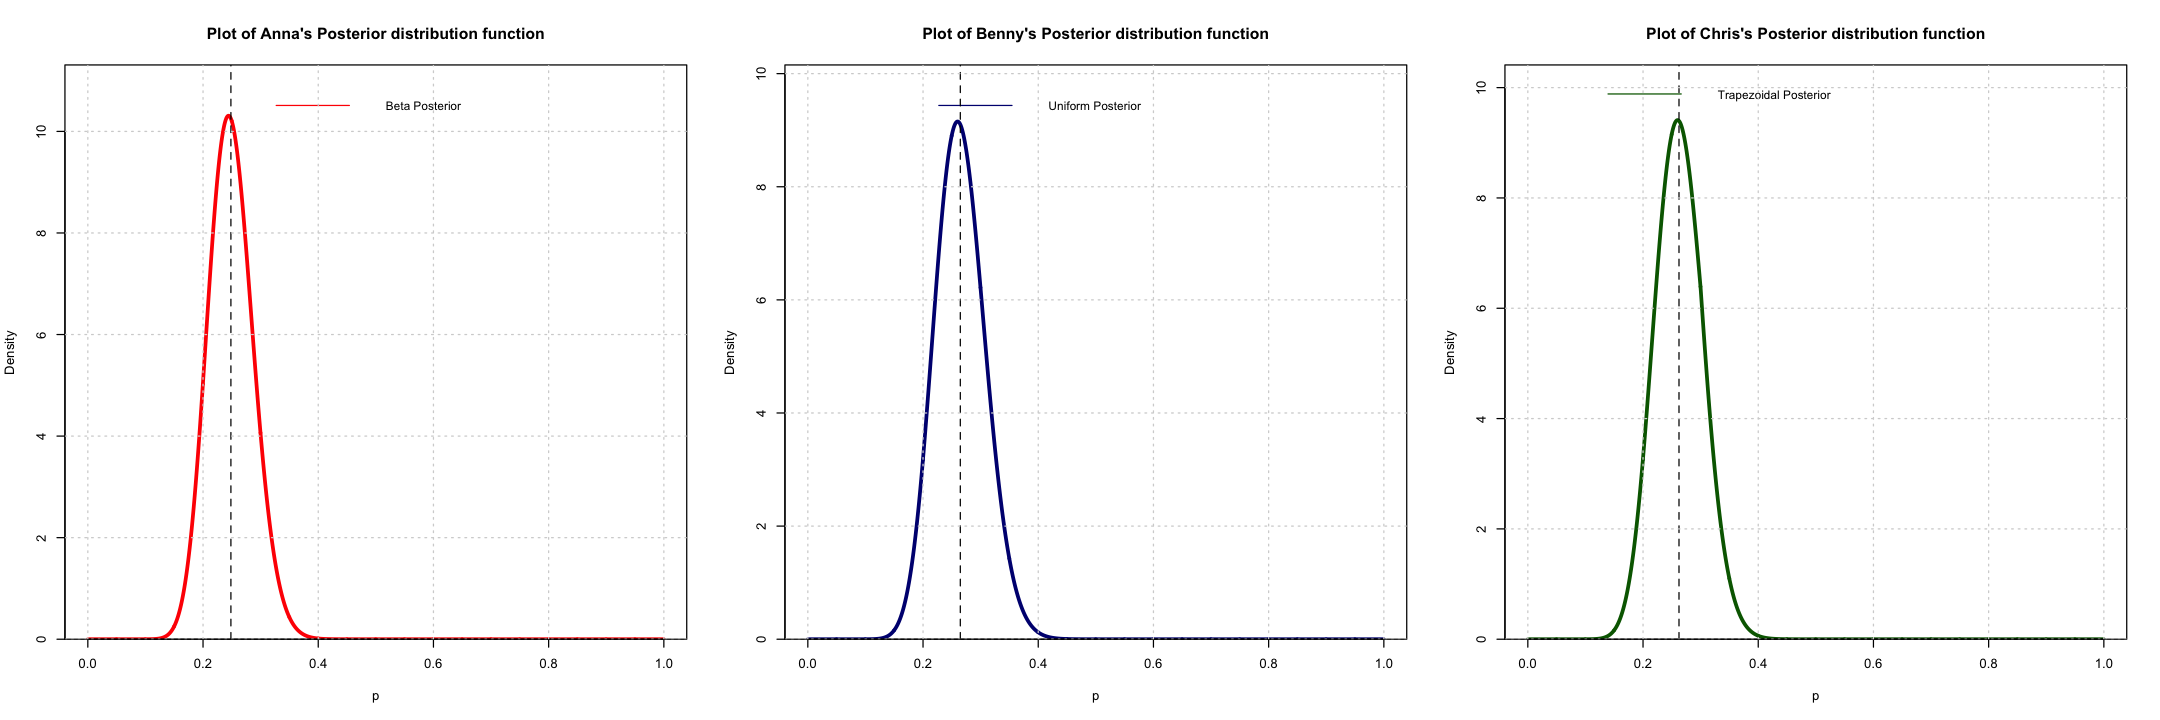

In [8]:
# set the size and position of the plots
par(mfrow=c(1,3))
options(repr.plot.width=18, repr.plot.height=6)

plot(p, anna.post.norm, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,max(anna.post.norm)+1),
     main = "Plot of Anna's Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Beta Posterior"), col=c("red"), lty=1, cex=0.9,box.lty=0)
p.mean <- delta.p*sum(p*anna.post.norm)
abline(v=p.mean, lty=2,col='black')
grid()

plot(p, benny.post.norm, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(benny.post.norm)+1),
     main = "Plot of Benny's Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Uniform Posterior"), col=c("navy"), lty=1, cex=0.9,box.lty=0)
p.mean <- delta.p*sum(p*benny.post.norm)
abline(v=p.mean, lty=2,col='black')
grid()

plot(p, chris.post.norm, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0,max(chris.post.norm)+1),
     main = "Plot of Chris's Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.03,legend=c("Trapezoidal Posterior"), col=c("darkgreen"), lty=1, cex=0.9,box.lty=0)
p.mean <- delta.p*sum(p*chris.post.norm)
abline(v=p.mean, lty=2,col='black')
grid()

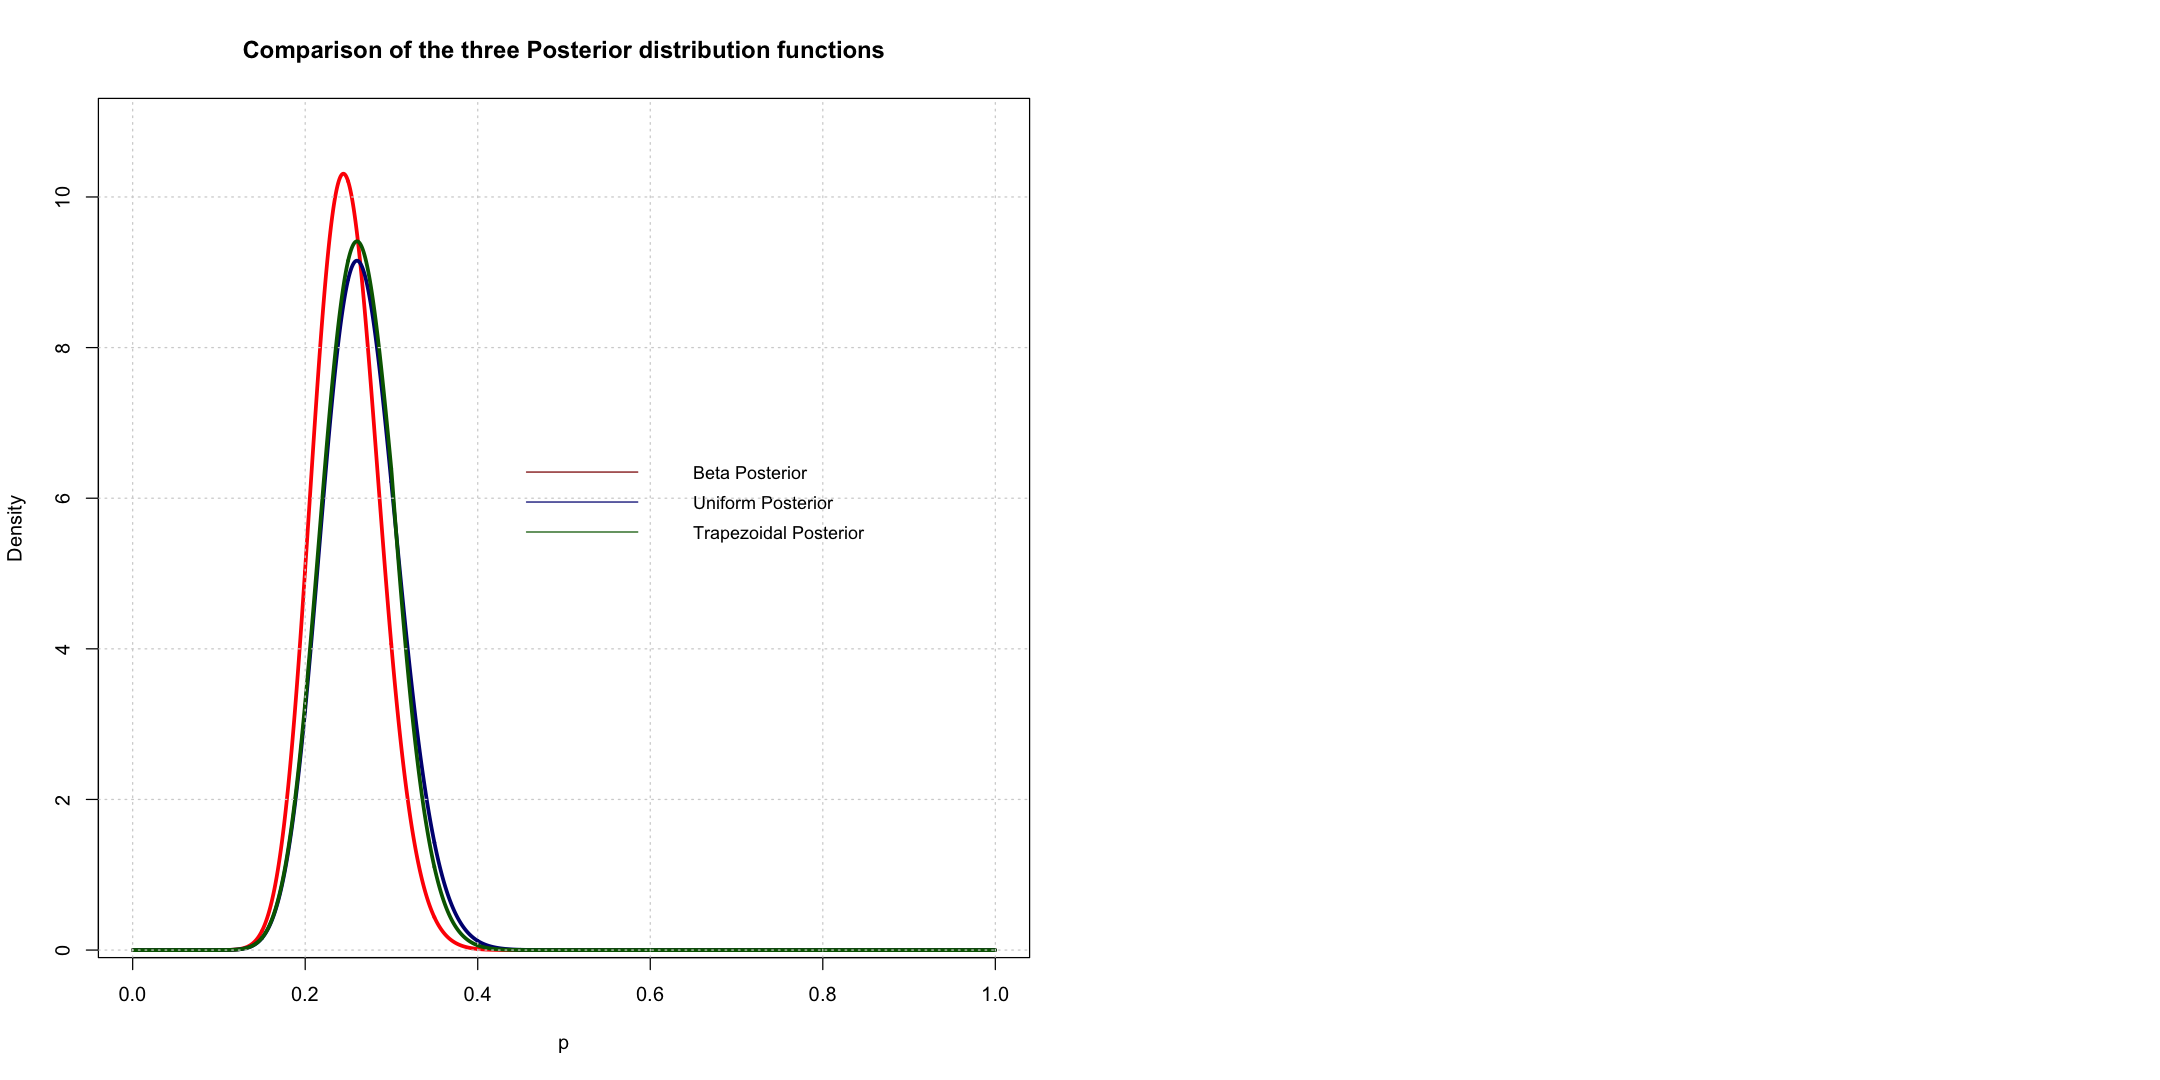

In [9]:
# Plot in the same graph

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=18, repr.plot.height=9)

plot(p, anna.post.norm, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0-0.1,max(anna.post.norm)+1),
     main = "Comparison of the three Posterior distribution functions", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, benny.post.norm, col='navy', type='l', lty=1, lwd = 3)
lines(p, chris.post.norm, col='darkgreen', type='l', lty=1, lwd = 3)

legend("topleft", inset=0.4,legend=c("Beta Posterior","Uniform Posterior","Trapezoidal Posterior"), col=c("darkred","navy","darkgreen"), lty=1, cex=0.9,box.lty=0)
grid()

### C) Give an estimate of the most probable value and the 95% credibility interval.

In [10]:
# Give an estimate of the most probqble value of the Posterior
max.anna  <- p[which.max(anna.post.norm)]
max.benny <- p[which.max(benny.post.norm)]
max.chris <- p[which.max(chris.post.norm)]

cat("The most probable value of the Posterior for Anna's Uniform Prior is :\t", max.anna,'\n')
cat("The most probable value of the Posterior for Benny's Uniform Prior is:\t", max.benny,'\n')
cat("The most probable value of the Posterior for Chris's Uniform Prior is:\t", max.chris)

The most probable value of the Posterior for Anna's Uniform Prior is :	 0.24425 
The most probable value of the Posterior for Benny's Uniform Prior is:	 0.26025 
The most probable value of the Posterior for Chris's Uniform Prior is:	 0.26025

Now, let us find $x_1$ and $x_2$ such that the area of the Posterior distribution function is equal to 0.95. In particular, we take $x_1$ and $x_2$ such that the two tails of the distribution contains 0.025*area.

In [11]:
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

anna.area <- delta.p*cumsum(anna.post.norm)
benny.area <- delta.p*cumsum(benny.post.norm)
chris.area <- delta.p*cumsum(chris.post.norm)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.anna <- cl.func(p,anna.area,cl)
x.benny <- cl.func(p,benny.area,cl)
x.chris <- cl.func(p,chris.area,cl)


cat("Anna Prior:\t", 'x1=', x.anna[1],'\tx2=', x.anna[2],'\n')
cat("Benny Prior:\t", 'x1=', x.benny[1],'\tx2=', x.benny[2],'\n')
cat("Chris Prior:\t", 'x1=', x.chris[1],'\tx2=', x.chris[2],'\n')

Anna Prior:	 x1= 0.1765 	x2= 0.3275 
Benny Prior:	 x1= 0.184 	x2= 0.354 
Chris Prior:	 x1= 0.1835 	x2= 0.346 


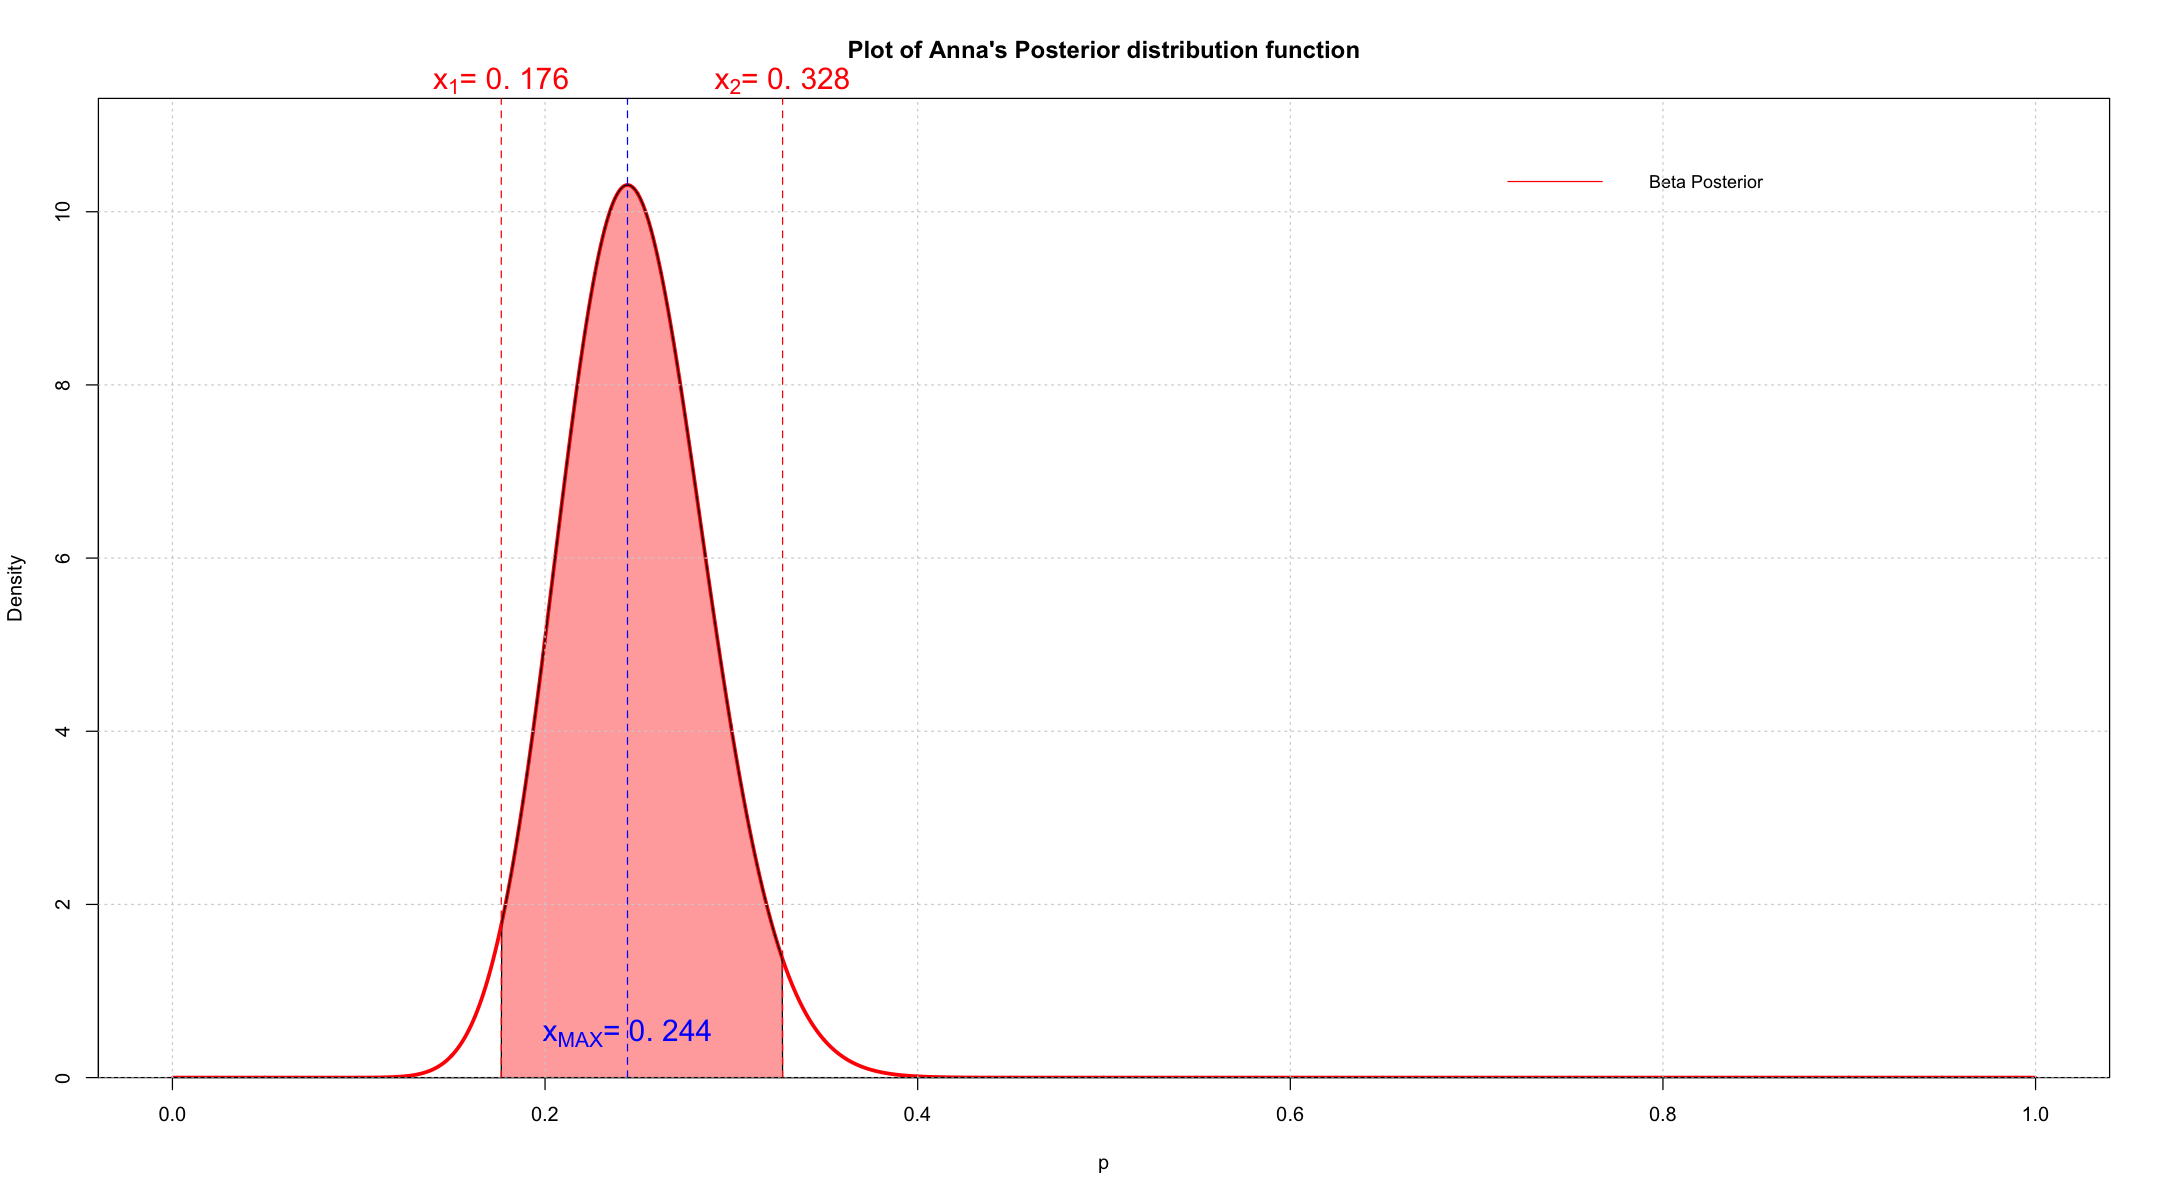

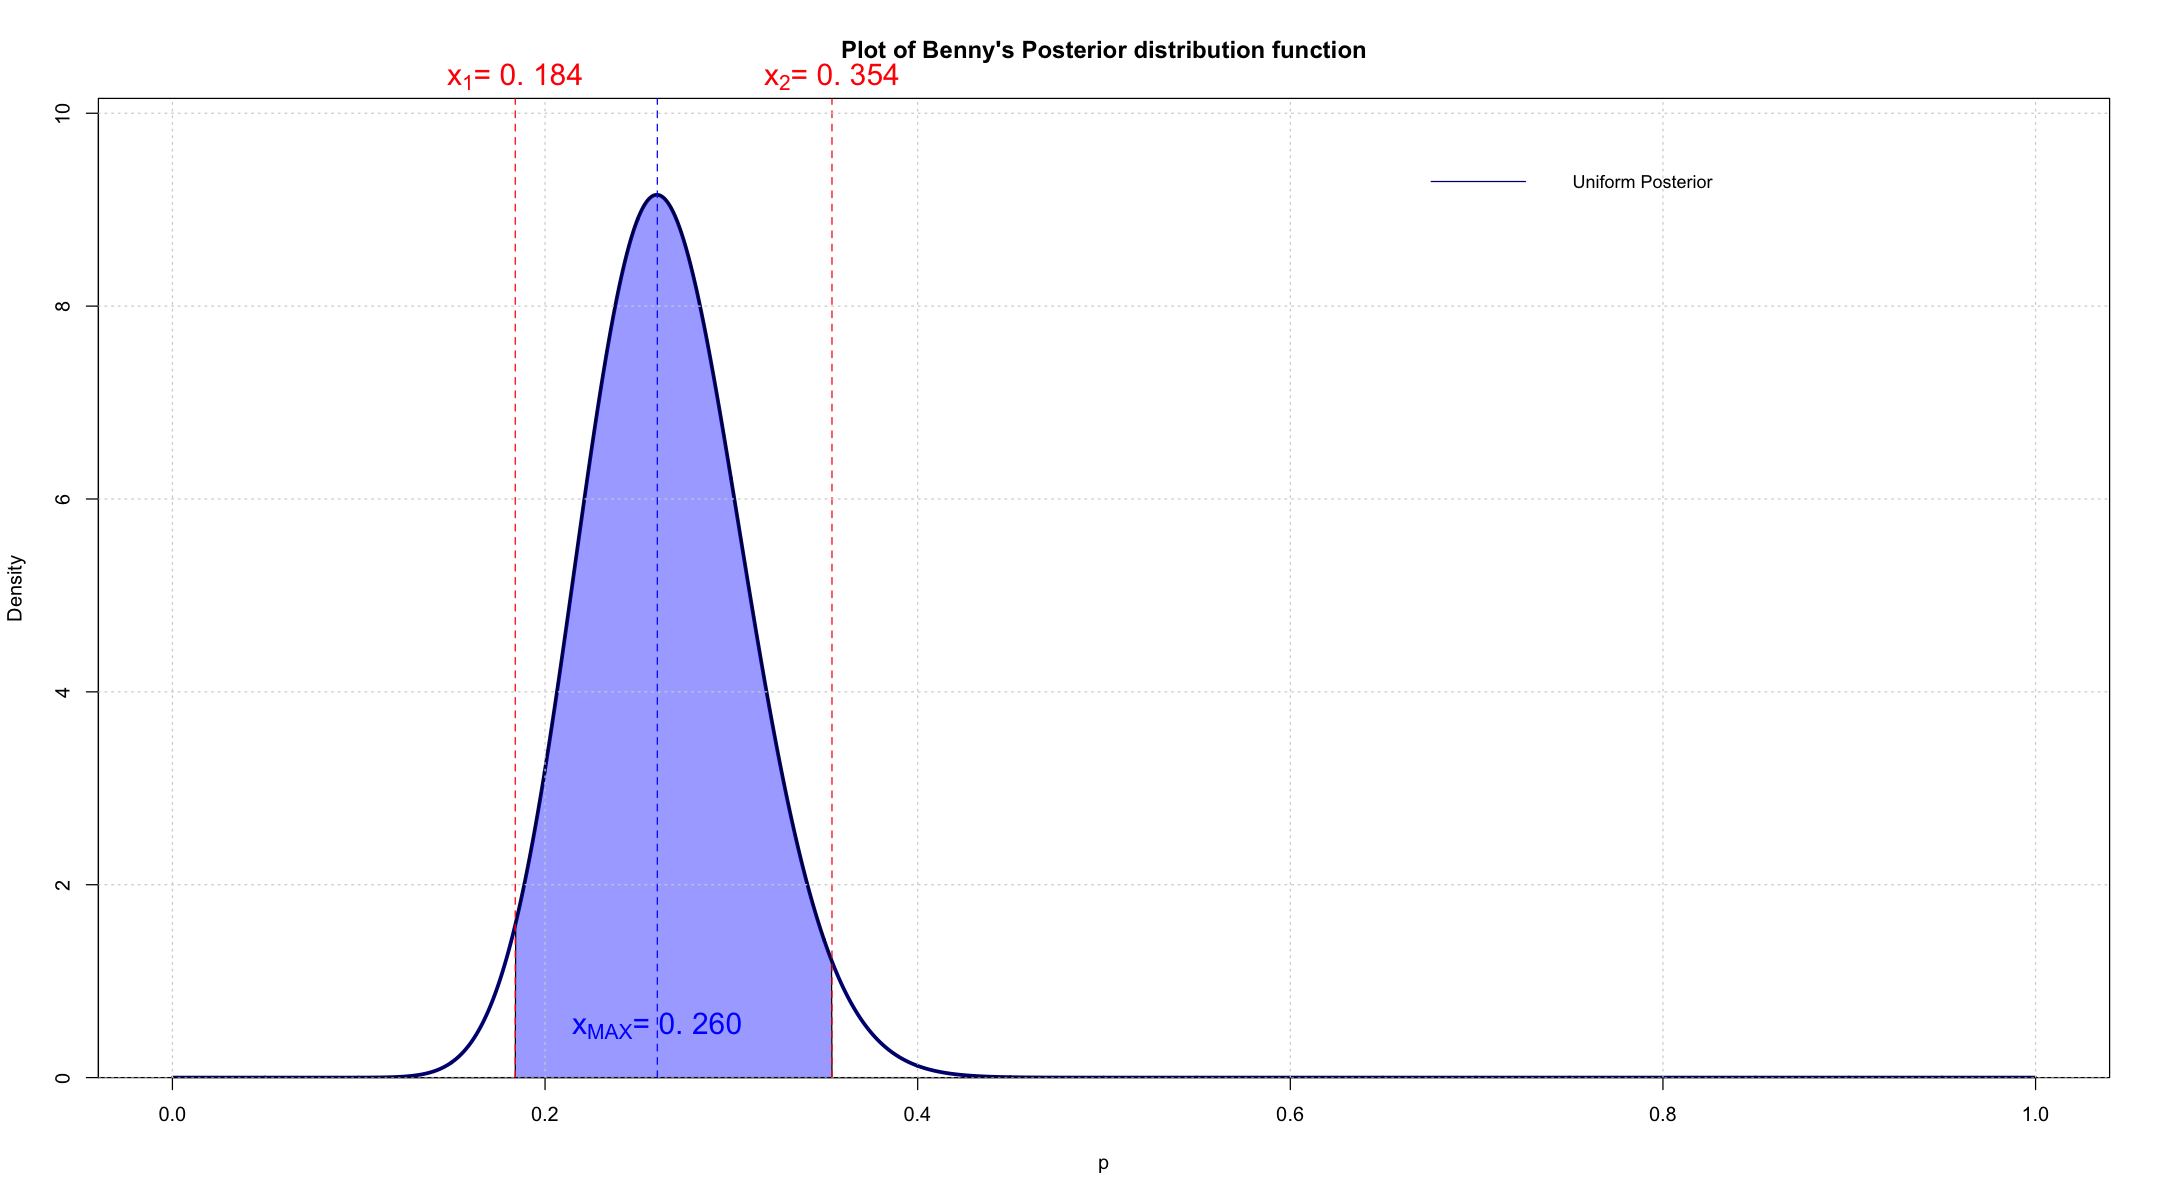

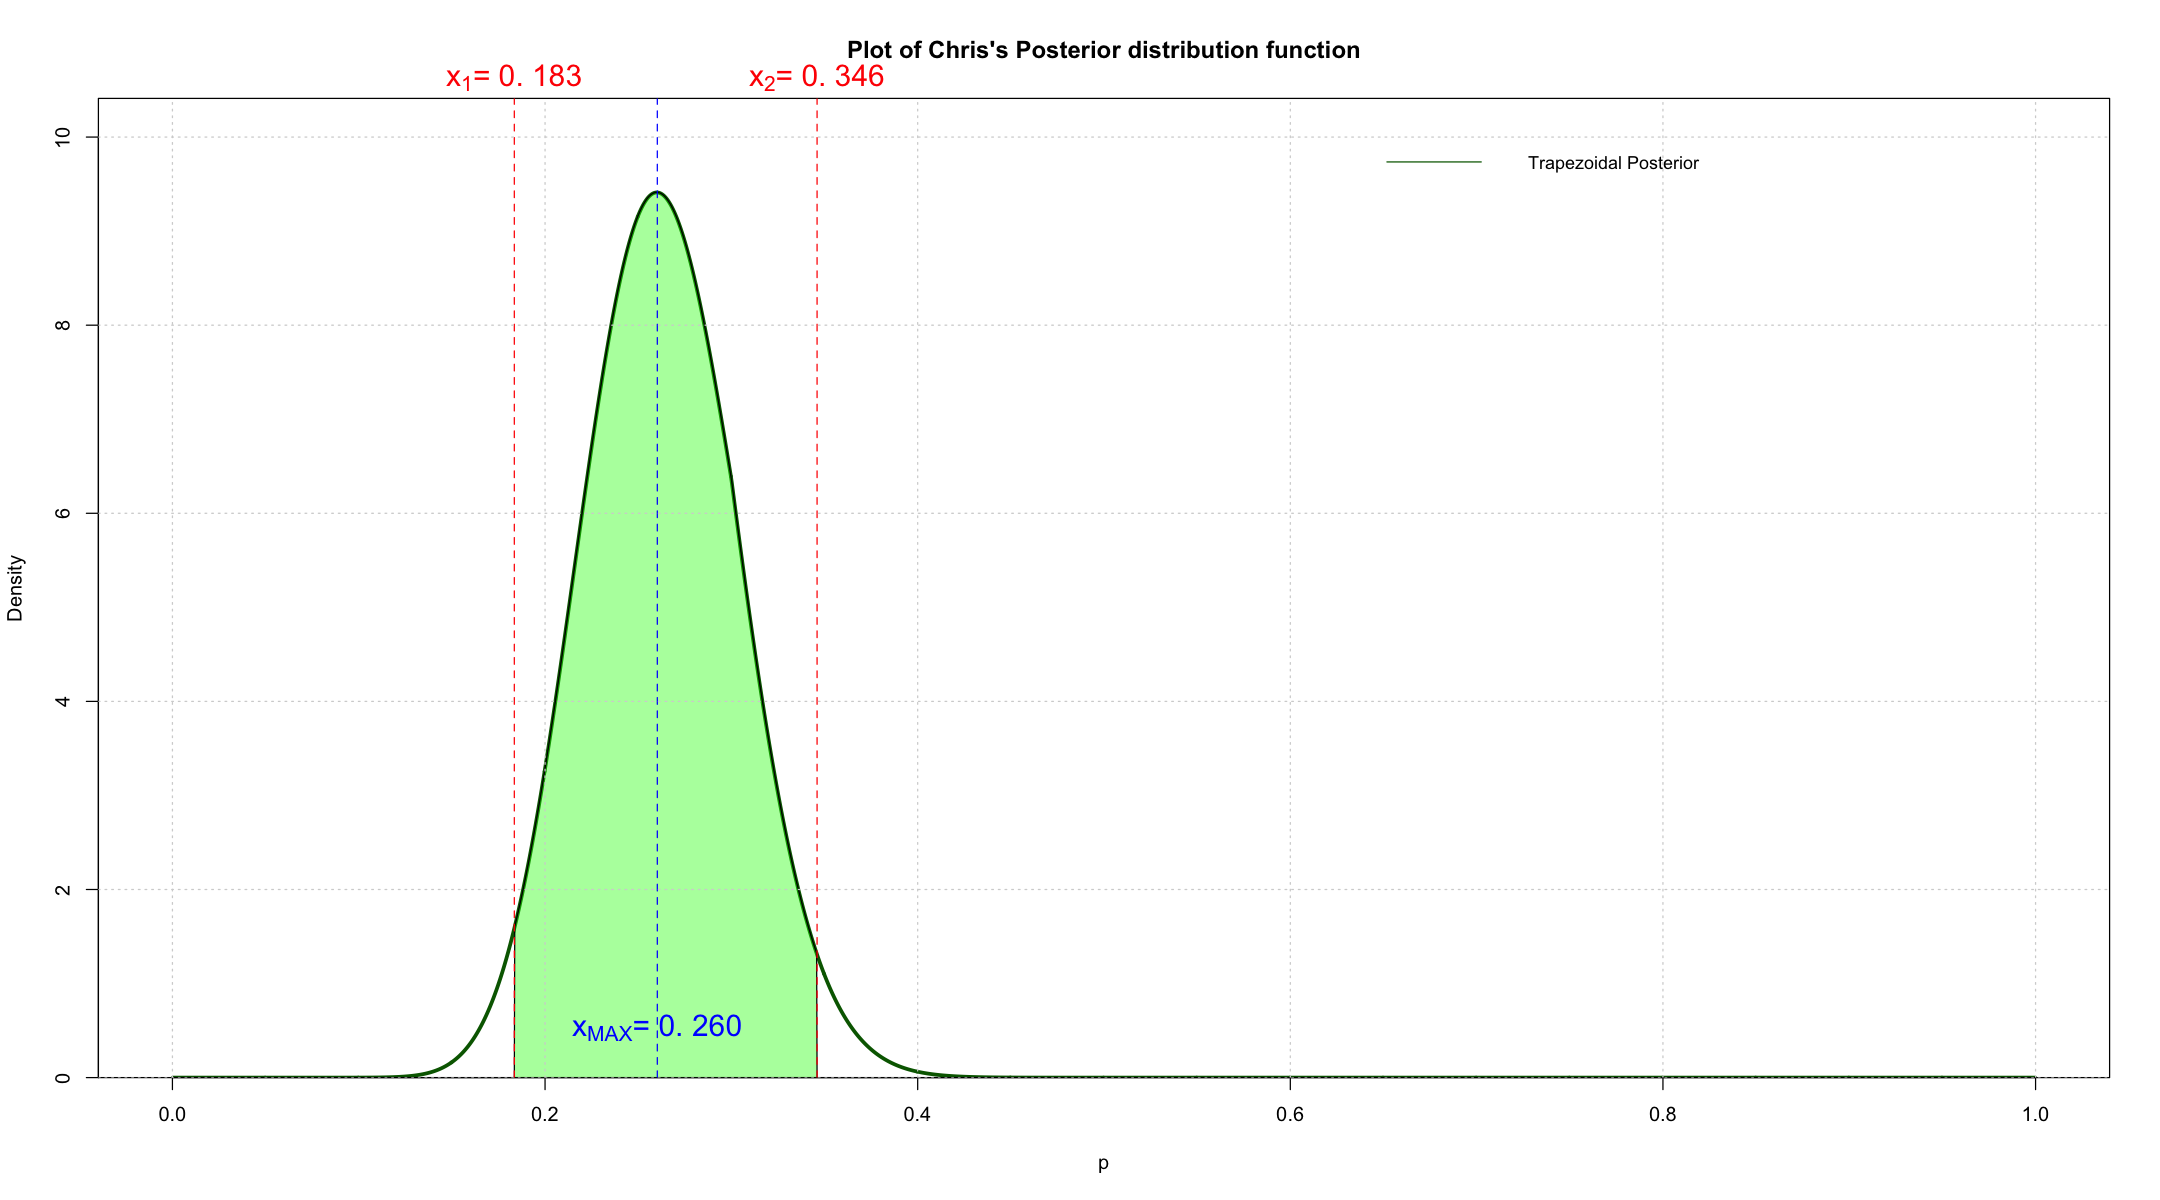

In [12]:
# set the size and position of the plots
par(mfrow=c(1,1))
options(repr.plot.width=18, repr.plot.height=10)

# Anna Posterior
plot(p, anna.post.norm, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,max(anna.post.norm)+1),
     main = "Plot of Anna's Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Beta Posterior"), col=c("red"), lty=1, cex=0.9,box.lty=0)

x <- c(x.anna[1],p[p>x.anna[1] & p<x.anna[2]],x.anna[2])
y <- c(0,anna.post.norm[which(p>x.anna[1] & p<x.anna[2])],0)
polygon(x = x, y = y, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

abline(v=max.anna, lty=2,col='blue')
abline(v=x.anna[1], lty=2,col='red')
abline(v=x.anna[2], lty=2,col='red')

text(max.anna, par("usr")[1] + 0.8, labels = TeX(sprintf("$x_{MAX}$= %0.3f",max.anna)), pos=1, cex=1.5, col="blue", xpd=TRUE)
text(x.anna[1], par("usr")[4] + 0.45, labels = TeX(sprintf("$x_1$= %0.3f",x.anna[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.anna[2], par("usr")[4] + 0.45, labels = TeX(sprintf("$x_2$= %0.3f",x.anna[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


# Benny Posterior
plot(p, benny.post.norm, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(benny.post.norm)+1),
     main = "Plot of Benny's Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Uniform Posterior"), col=c("navy"), lty=1, cex=0.9,box.lty=0)

x <- c(x.benny[1],p[p>x.benny[1] & p<x.benny[2]],x.benny[2])
y <- c(0,benny.post.norm[which(p>x.benny[1] & p<x.benny[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=max.benny, lty=2,col='blue')
abline(v=x.benny[1], lty=2,col='red')
abline(v=x.benny[2], lty=2,col='red')

text(max.benny, par("usr")[1] + 0.8, labels = TeX(sprintf("$x_{MAX}$= %0.3f",max.benny)), pos=1, cex=1.5, col="blue", xpd=TRUE)
text(x.benny[1], par("usr")[4] + 0.45, labels = TeX(sprintf("$x_1$= %0.3f",x.benny[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.benny[2], par("usr")[4] + 0.45, labels = TeX(sprintf("$x_2$= %0.3f",x.benny[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


# Chris Posterior
plot(p, chris.post.norm, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0,max(chris.post.norm)+1),
     main = "Plot of Chris's Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.03,legend=c("Trapezoidal Posterior"), col=c("darkgreen"), lty=1, cex=0.9,box.lty=0)

x <- c(x.chris[1],p[p>x.chris[1] & p<x.chris[2]],x.chris[2])
y <- c(0,chris.post.norm[which(p>x.chris[1] & p<x.chris[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

p.mean <- delta.p*sum(p*chris.post.norm)
abline(v=max.chris, lty=2,col='blue')
abline(v=x.chris[1], lty=2,col='red')
abline(v=x.chris[2], lty=2,col='red')

text(max.chris, par("usr")[1] + 0.8, labels = TeX(sprintf("$x_{MAX}$= %0.3f",max.chris)), pos=1, cex=1.5, col="blue", xpd=TRUE)
text(x.chris[1], par("usr")[4] + 0.45, labels = TeX(sprintf("$x_1$= %0.3f",x.chris[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.chris[2], par("usr")[4] + 0.45, labels = TeX(sprintf("$x_2$= %0.3f",x.chris[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


## Exercise 3 - Flip of a coin<a class="anchor" id="3"></a>
* [Index](#0)

A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H


### A) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

We have a coin and we toss it $n$ times. The coin lands heads in $r$ of them. 

The appropriate **Likelihood** is the **binomial distribution**:

$$
P(r|p,n,M) = \begin{pmatrix} n \\ r \end{pmatrix} p^r (1-p)^{n-r} \quad \text{with } r \le n
$$


In [13]:
# Vector of outcomes
out <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 
              'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')

n <- length(out)
r <- length(out[out == 'H']) # Number of heads

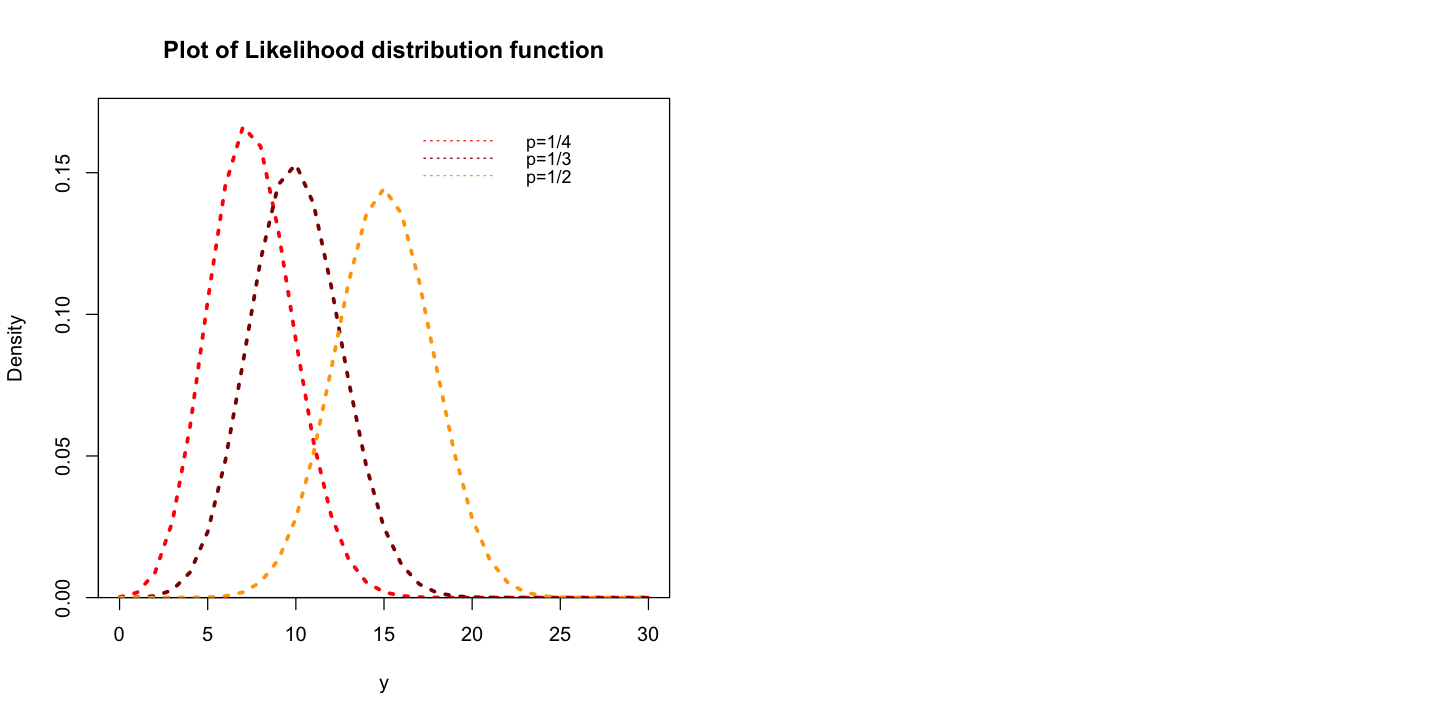

In [14]:
x <- seq(0, n, 1)

# Likelihood for different value of probability
p.like1 <- dbinom(x=x, size=n, prob=1/4)
p.like2 <- dbinom(x=x, size=n, prob=1/3)
p.like3 <- dbinom(x=x, size=n, prob=1/2)


# Plot of Likelihood functions

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(x, p.like1, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,max(p.like1)+0.01),
     main = "Plot of Likelihood distribution function", lty=3, lwd = 3, xlab="y", 
     ylab='Density')
lines(x, p.like2, xaxs='r', yaxs='i', col='darkred', type='l', ylim=c(0,max(p.like2)+0.01),
     main = "Plot of Likelihood distribution function", lty=3, lwd = 3, xlab="y", 
     ylab='Density')
lines(x, p.like3, xaxs='r', yaxs='i', col='orange', type='l', ylim=c(0,max(p.like3)+0.01),
     main = "Plot of Likelihood distribution function", lty=3, lwd = 3, xlab="y", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("p=1/4","p=1/3","p=1/2"),
       col=c("red", "darkred","orange"), lty=3:3:3, cex=0.9,
       box.lty=0)

In [15]:
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 

# Flat Prior
flat.prior <- dunif(x=p)

# Beta Prior
alpha <- 10
beta <- 10
beta.prior <- dbeta(x=p, alpha, beta)

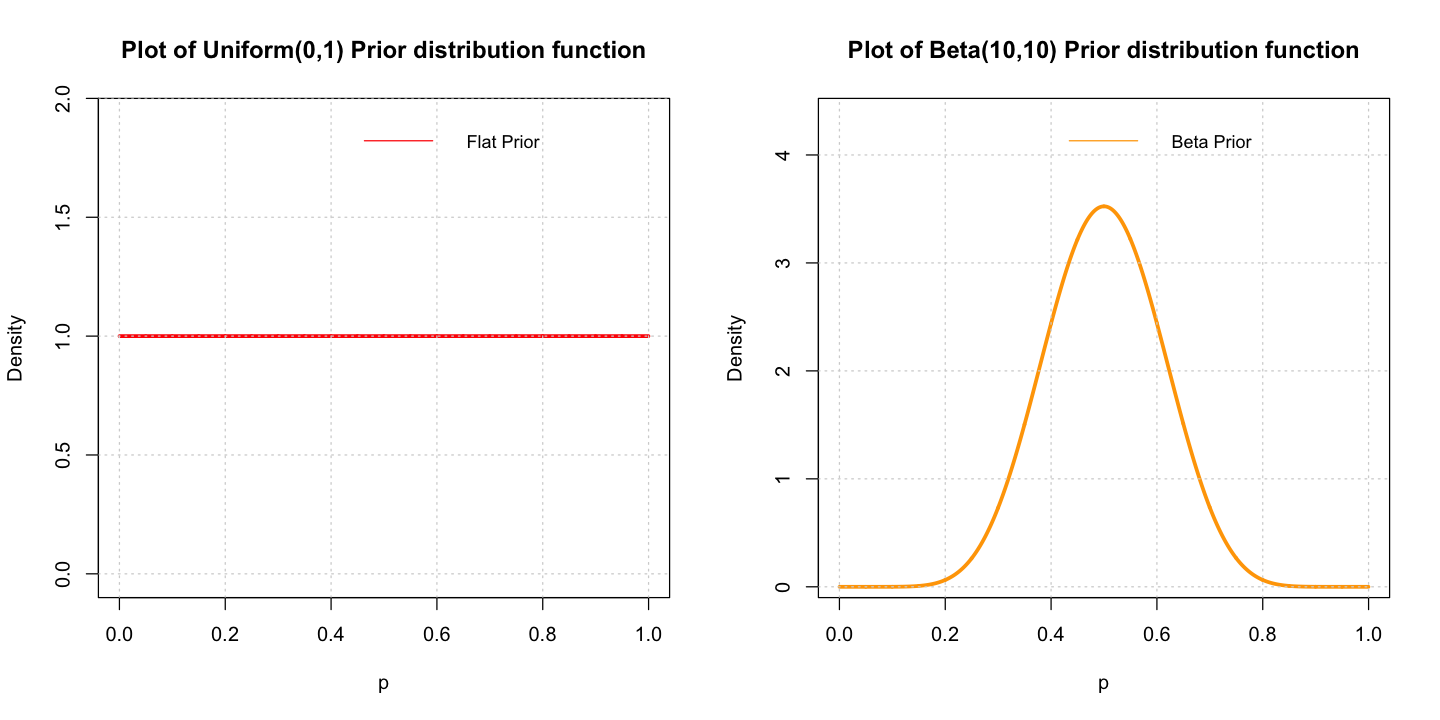

In [16]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(p, flat.prior, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0-0.1,max(flat.prior)+1),
     main = "Plot of Uniform(0,1) Prior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Flat Prior"), col=c("red"), lty=1, cex=0.9,box.lty=0)
grid()

plot(p, beta.prior, xaxs='r', yaxs='i', col='orange', type='l', ylim=c(0-0.1,max(beta.prior)+1),
     main = "Plot of Beta(10,10) Prior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Beta Prior"), col=c("orange"), lty=1, cex=0.9,box.lty=0)
grid()

* If we consider the **uniform Prior**: $ P(p|M) \sim U(0,1) $, the **Posterior** density distribution is simply proportional to the Likelihood:
$$
P(p|r,n,M) = \frac{1}{Z} p^r (1-p)^{n-r} = \frac{1}{Z} P^* (p|r,n,M)
$$
where $Z$ is the normalization factor (i.e. the **evidence** P(r|n,M)).


* If we consider the **beta Prior**: $ P(p|M) \sim Beta(\alpha_p,\beta_p) $, the **Posterior** density distribution is obtained by multiplying the Prior by the Likelihood. We get:
$$
P(p|r,n,M) = \frac{1}{Z} p^{r+\alpha-1} (1-p)^{n-r+\beta-1}
$$
Hence, the Posterior is another Beta distribution with parameters:
$$ \alpha = \alpha_p + r \quad \beta = \beta_p + n - r $$

In [17]:
# Compute the Posterior for Flat Prior 
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

p.star <- dbinom(x=r, size=n, prob=p)*flat.prior
#Normalized Posterior
flat.post <- p.star/(delta.p*sum(p.star))


# Compute the Posterior for Beta Prior 
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

beta.post <- dbeta(x=p, alpha+r, beta+n-r)

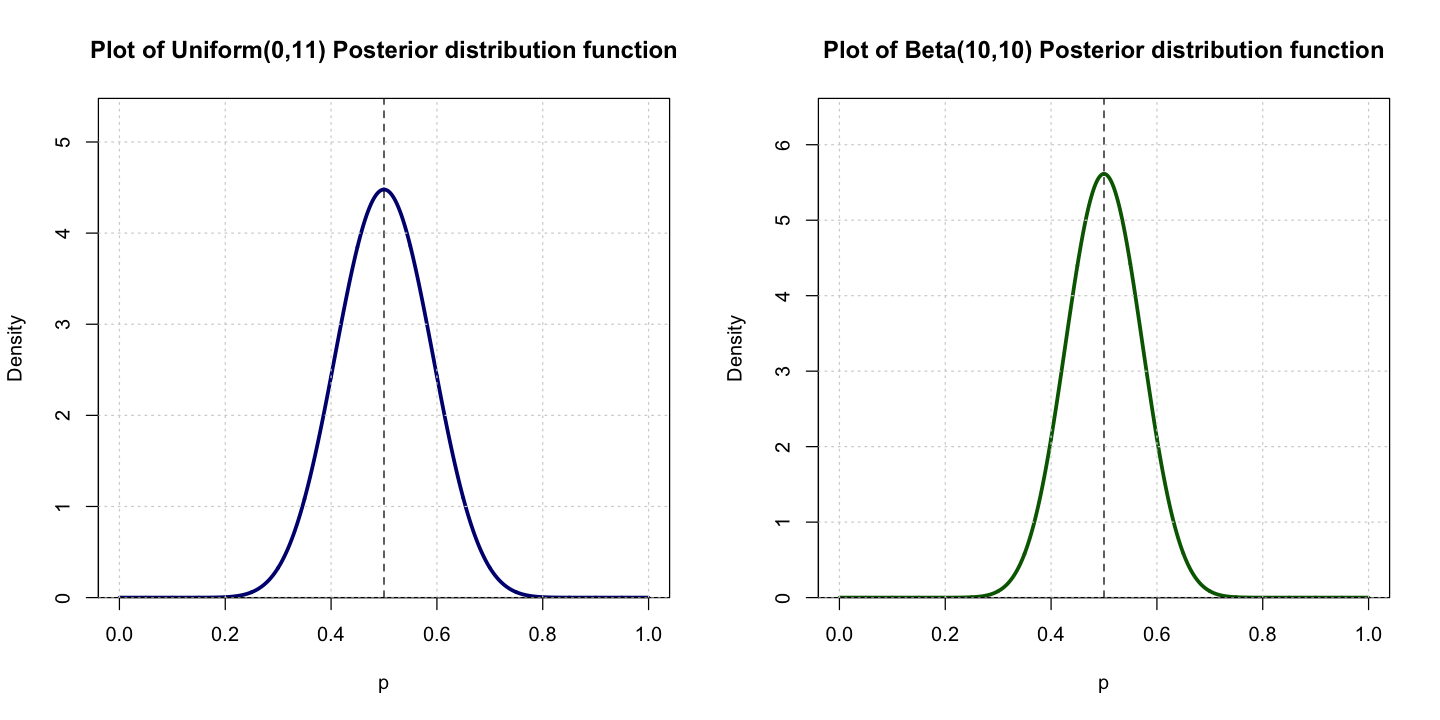

In [18]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(p, flat.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(flat.post)+1),
     main = "Plot of Uniform(0,11) Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')

p.mean <- delta.p*sum(p*flat.post)
abline(v=p.mean, lty=2,col='black')
grid()

plot(p, beta.post, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0,max(beta.post)+1),
     main = "Plot of Beta(10,10) Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')

p.mean <- delta.p*sum(p*beta.post)
abline(v=p.mean, lty=2,col='black')
grid()


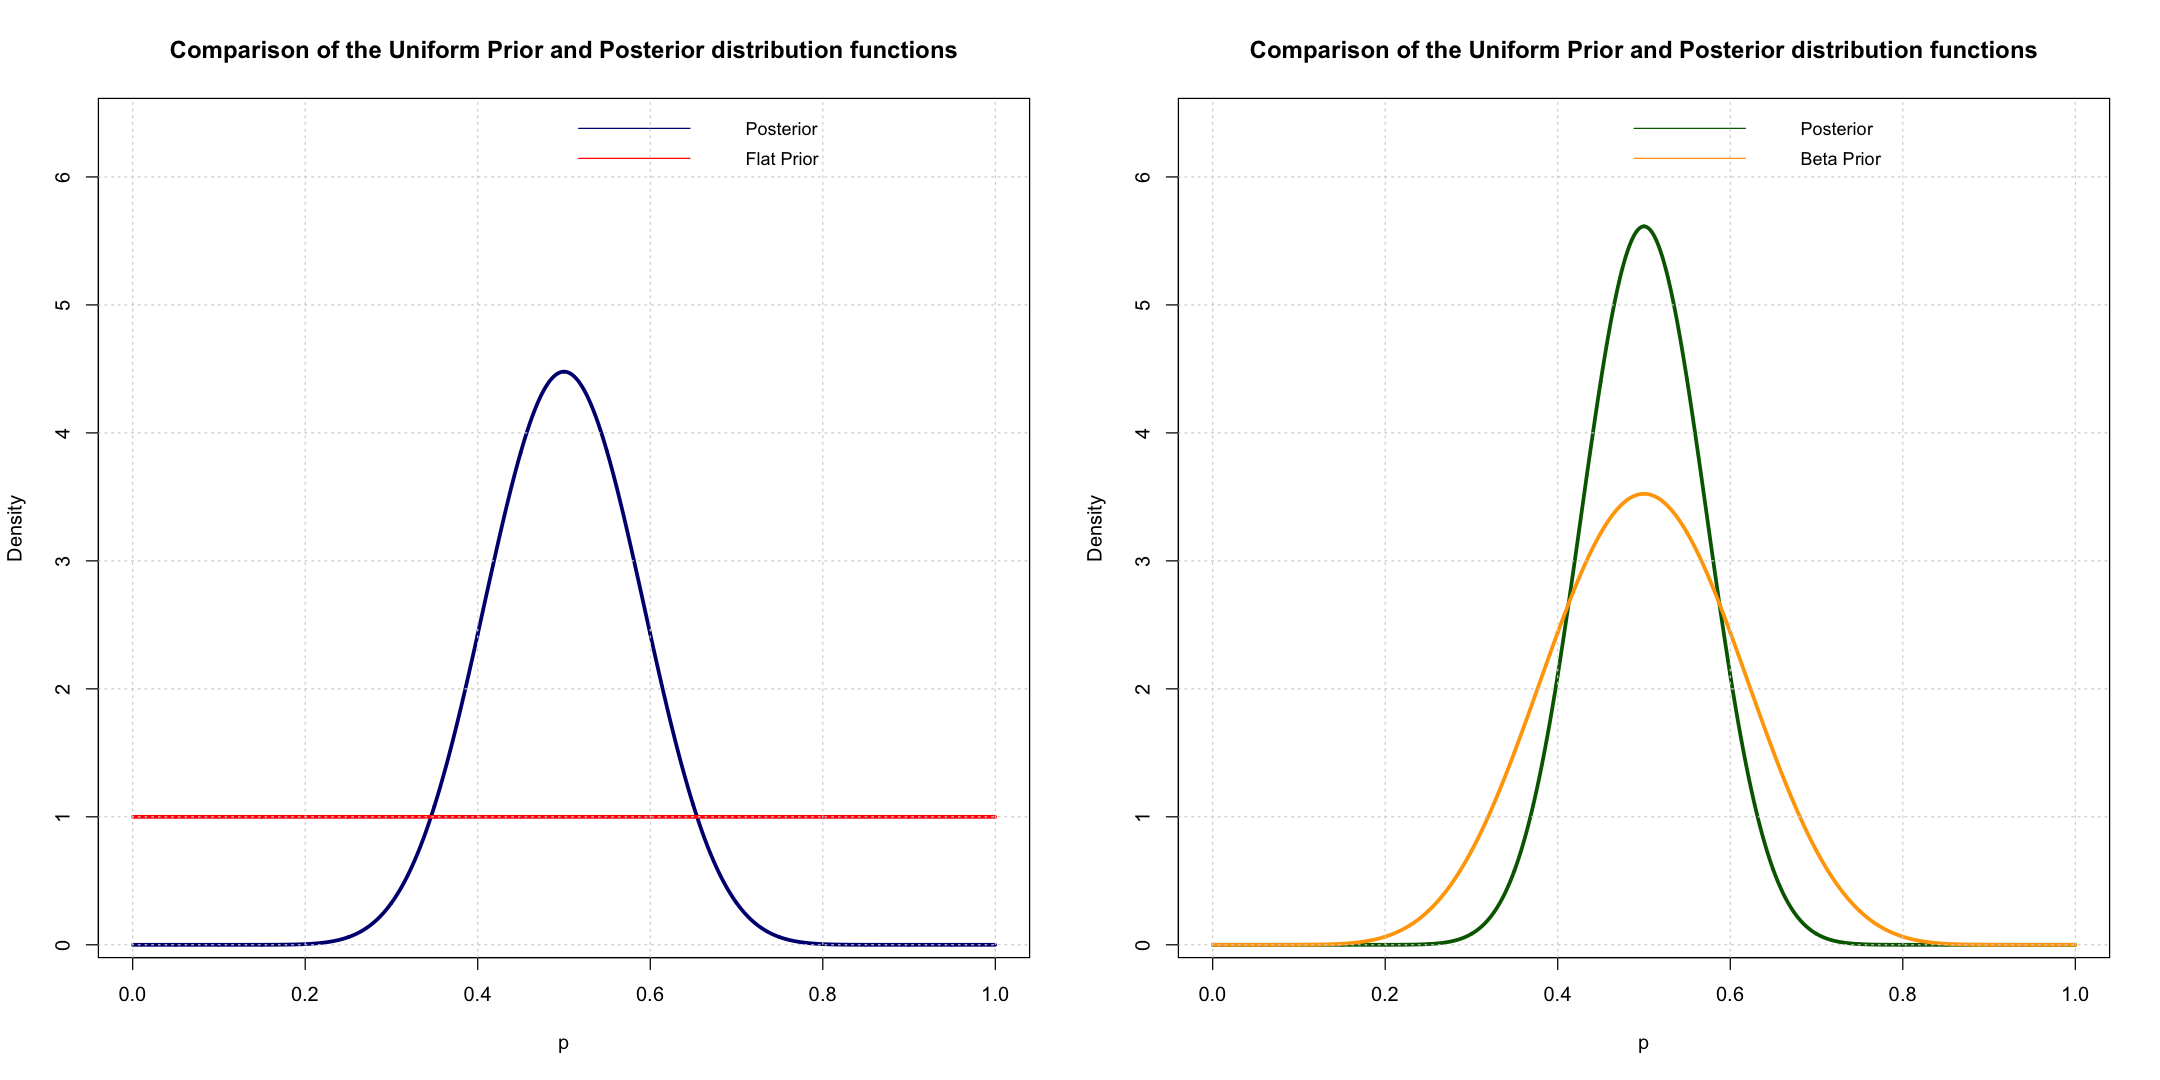

In [19]:
# Plot in the same graph

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=18, repr.plot.height=9)

plot(p, flat.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0-0.1,max(beta.post)+1),
     main = "Comparison of the Uniform Prior and Posterior distribution functions", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, flat.prior, col='red', type='l', lty=1, lwd = 3)

legend("topright", inset=0.0,legend=c("Posterior","Flat Prior"), col=c("navy","red"), lty=1, cex=0.9,box.lty=0)
grid()

plot(p, beta.post, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0-0.1,max(beta.post)+1),
     main = "Comparison of the Uniform Prior and Posterior distribution functions", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, beta.prior, col='orange', type='l', lty=1, lwd = 3)

legend("topright", inset=0.0,legend=c("Posterior","Beta Prior"), col=c("darkgreen","orange"), lty=1, cex=0.9,box.lty=0)
grid()


### B) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [20]:
# Give an estimate of the most probable value of the Posterior
max.flat  <- p[which.max(flat.post)]
max.beta <- p[which.max(beta.post)]

cat("The most probable value of the Posterior for Flat Prior is:", max.flat,'\n')
cat("The most probable value of the Posterior for Beta Prior is:", max.beta)

The most probable value of the Posterior for Flat Prior is: 0.49975 
The most probable value of the Posterior for Beta Prior is: 0.49975

In [21]:
# Give an estimate of 95% credibility interval
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

flat.area <- delta.p*cumsum(flat.post)
beta.area <- delta.p*cumsum(beta.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.flat <- cl.func(p,flat.area,cl)
x.beta<- cl.func(p,beta.area,cl)

cat("Flat Prior:\t", 'x1=', x.flat[1],'\tx2=', x.flat[2],'\n')
cat("Beta Prior:\t", 'x1=', x.beta[1],'\tx2=', x.beta[2],'\n')

Flat Prior:	 x1= 0.3305 	x2= 0.669 
Beta Prior:	 x1= 0.363 	x2= 0.6365 


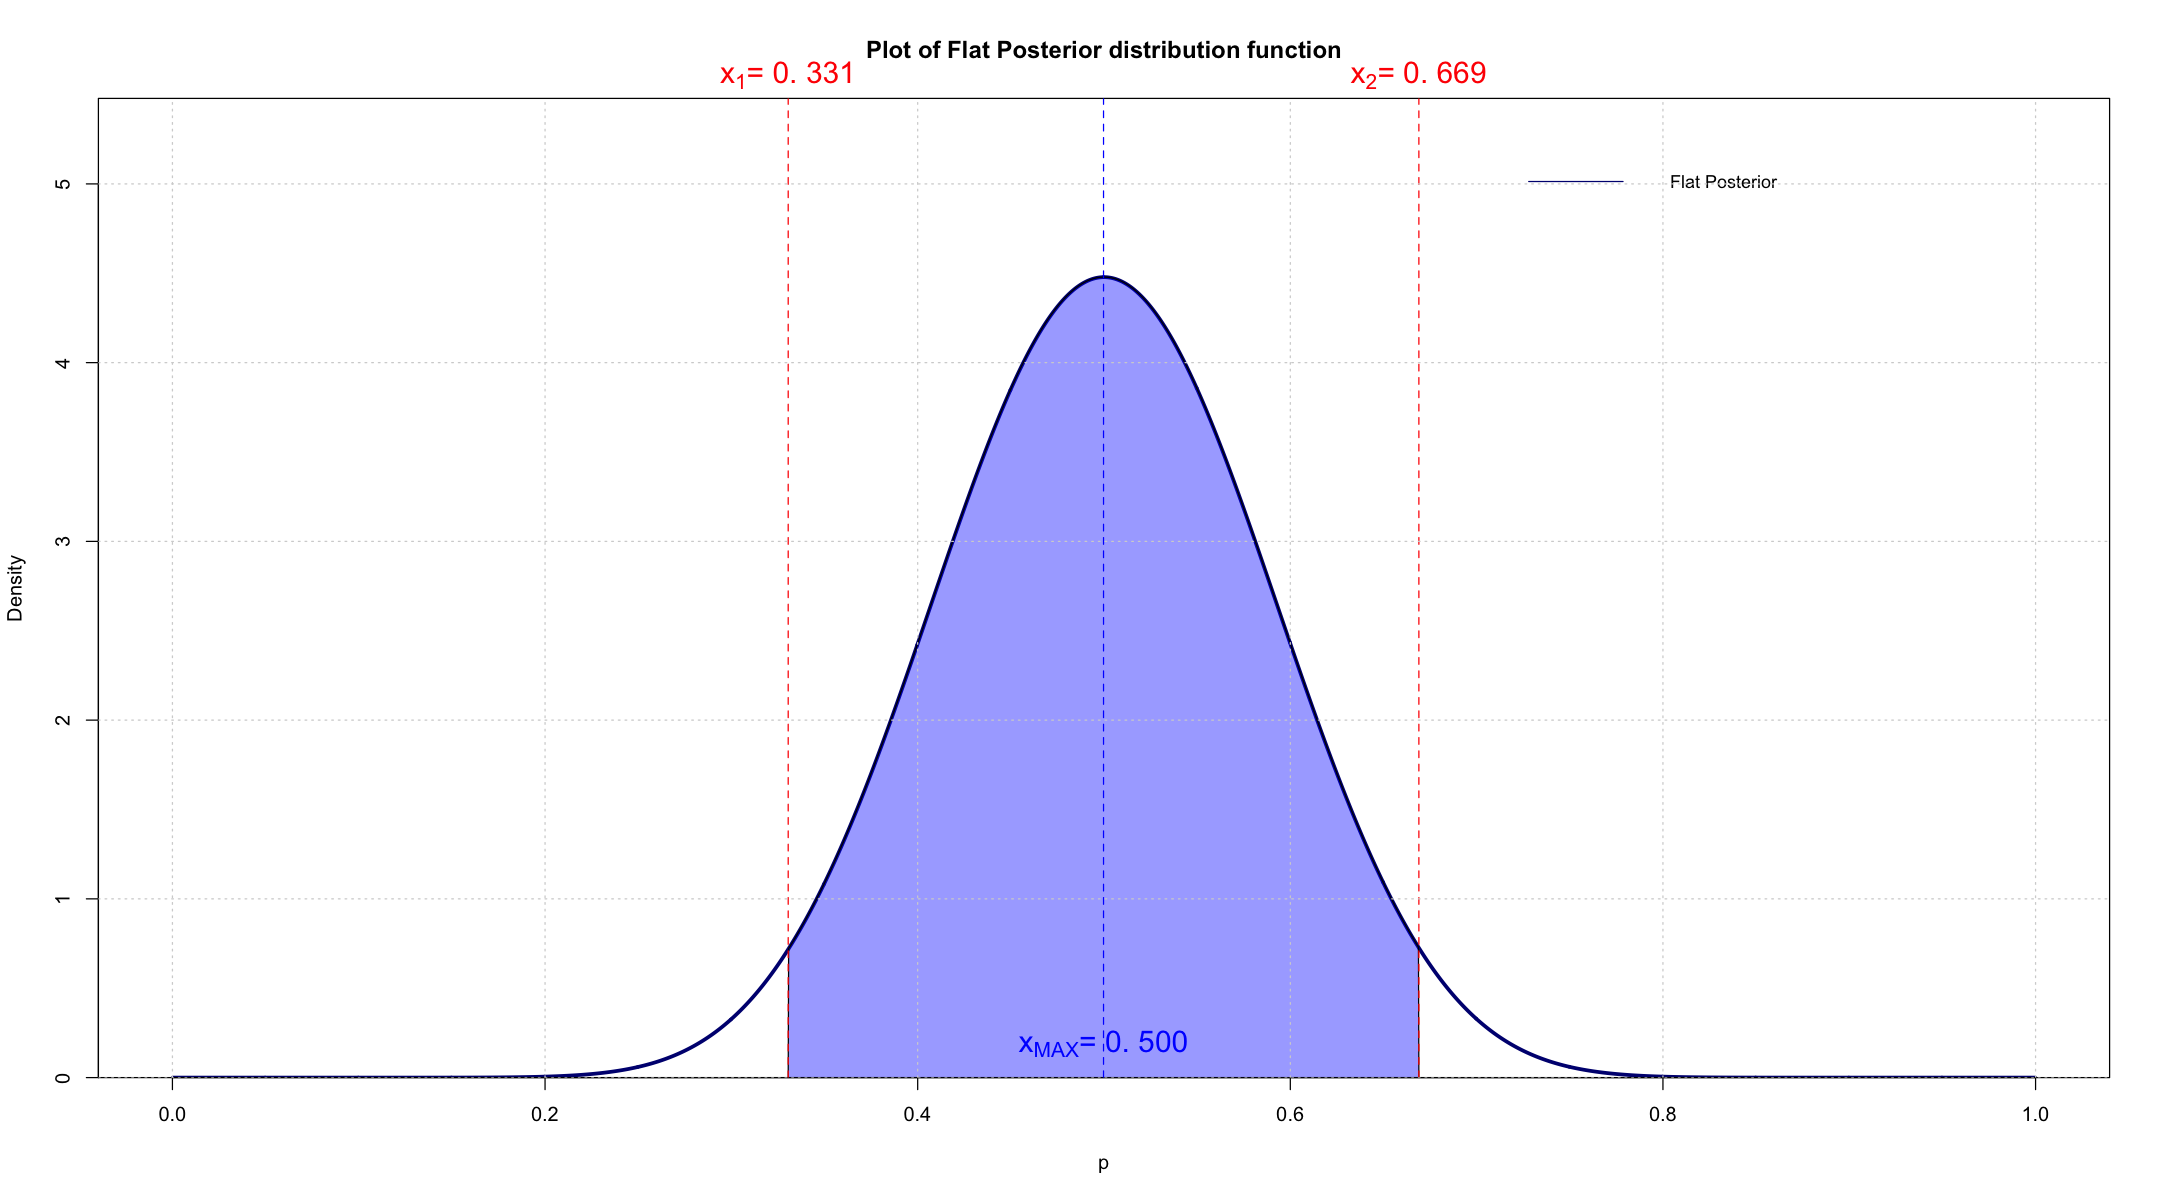

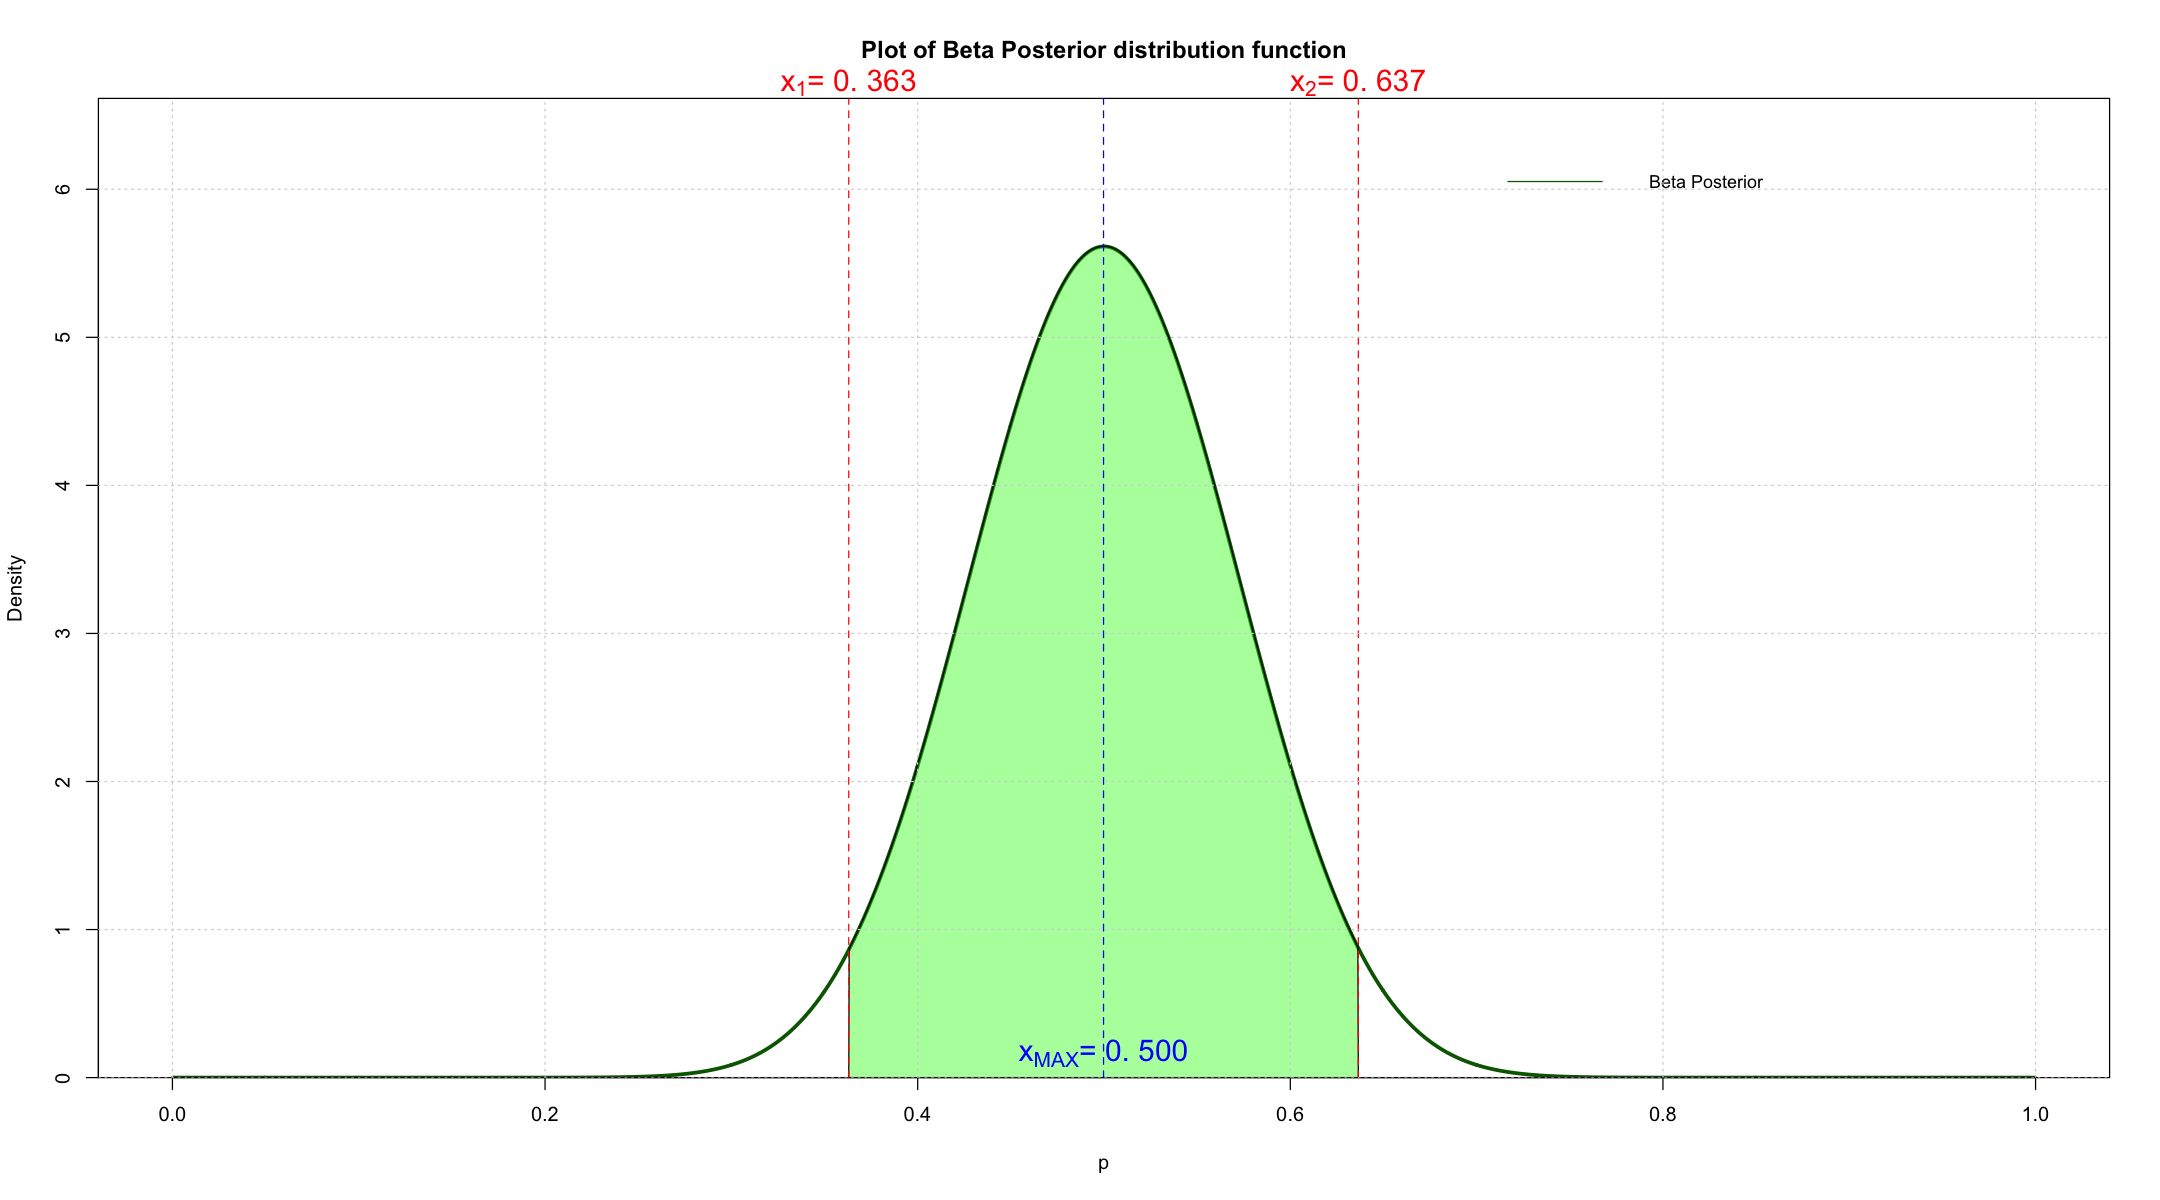

In [22]:
# set the size and position of the plots
par(mfrow=c(1,1))
options(repr.plot.width=18, repr.plot.height=10)

# Flat Posterior
plot(p, flat.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(flat.post)+1),
     main = "Plot of Flat Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Flat Posterior"), col=c("navy"), lty=1, cex=0.9,box.lty=0)

x <- c(x.flat[1],p[p>x.flat[1] & p<x.flat[2]],x.flat[2])
y <- c(0,flat.post[which(p>x.flat[1] & p<x.flat[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=max.flat, lty=2,col='blue')
abline(v=x.flat[1], lty=2,col='red')
abline(v=x.flat[2], lty=2,col='red')

text(max.flat, par("usr")[1] + 0.35, labels = TeX(sprintf("$x_{MAX}$= %0.3f",max.flat)), pos=1, cex=1.5, col="blue", xpd=TRUE)
text(x.flat[1], par("usr")[4] + 0.25, labels = TeX(sprintf("$x_1$= %0.3f",x.flat[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.flat[2], par("usr")[4] + 0.25, labels = TeX(sprintf("$x_2$= %0.3f",x.flat[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


# Beta Posterior
plot(p, beta.post, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0,max(beta.post)+1),
     main = "Plot of Beta Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Beta Posterior"), col=c("darkgreen"), lty=1, cex=0.9,box.lty=0)

x <- c(x.beta[1],p[p>x.beta[1] & p<x.beta[2]],x.beta[2])
y <- c(0,beta.post[which(p>x.beta[1] & p<x.beta[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

abline(v=max.beta, lty=2,col='blue')
abline(v=x.beta[1], lty=2,col='red')
abline(v=x.beta[2], lty=2,col='red')

text(max.beta, par("usr")[1] + 0.35, labels = TeX(sprintf("$x_{MAX}$= %0.3f",max.beta)), pos=1, cex=1.5, col="blue", xpd=TRUE)
text(x.beta[1], par("usr")[4] + 0.25, labels = TeX(sprintf("$x_1$= %0.3f",x.beta[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.beta[2], par("usr")[4] + 0.25, labels = TeX(sprintf("$x_2$= %0.3f",x.beta[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()

### C) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

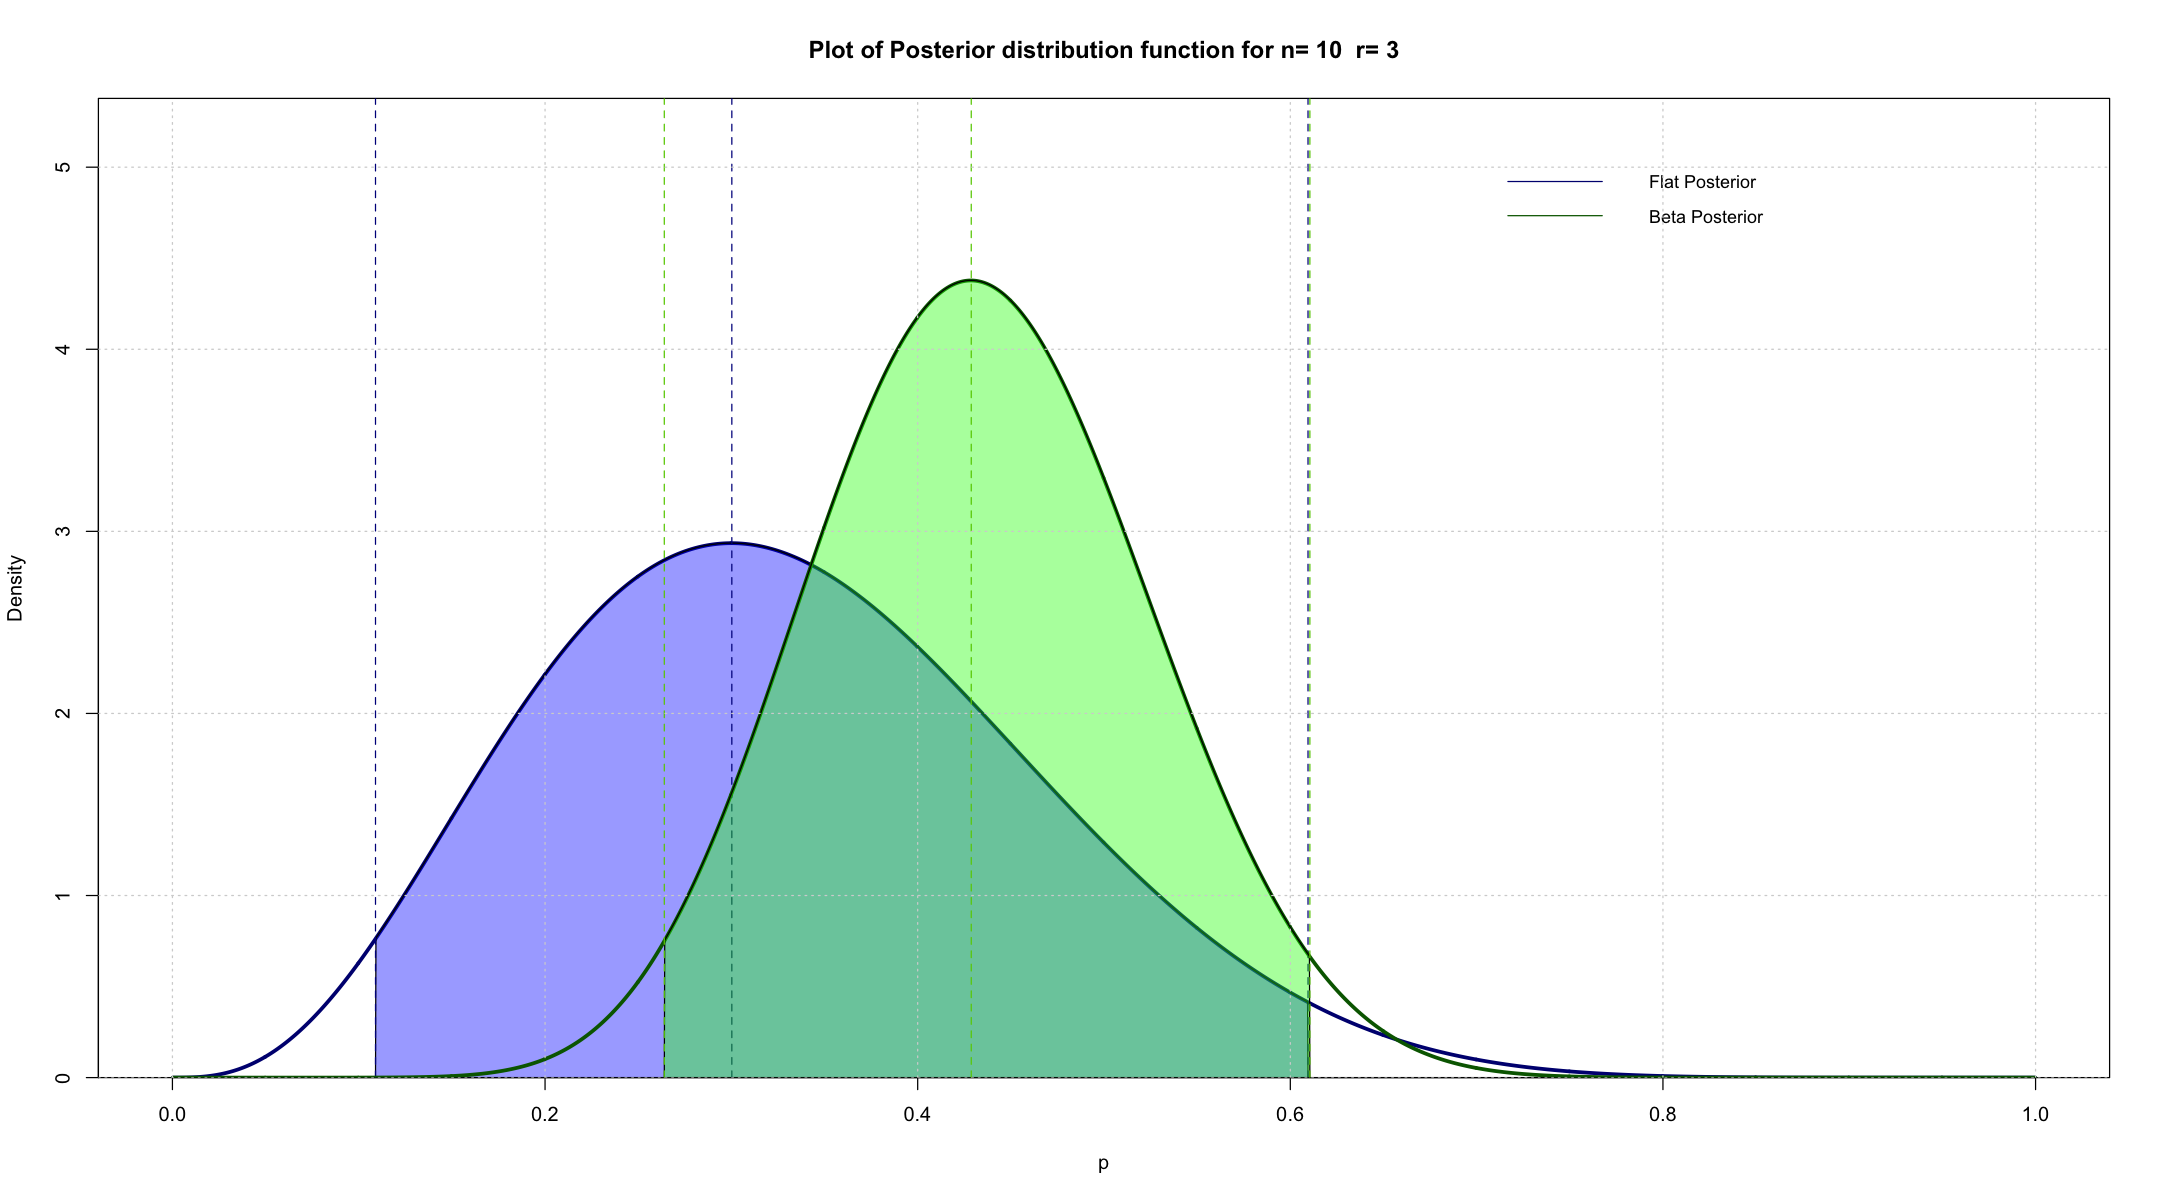

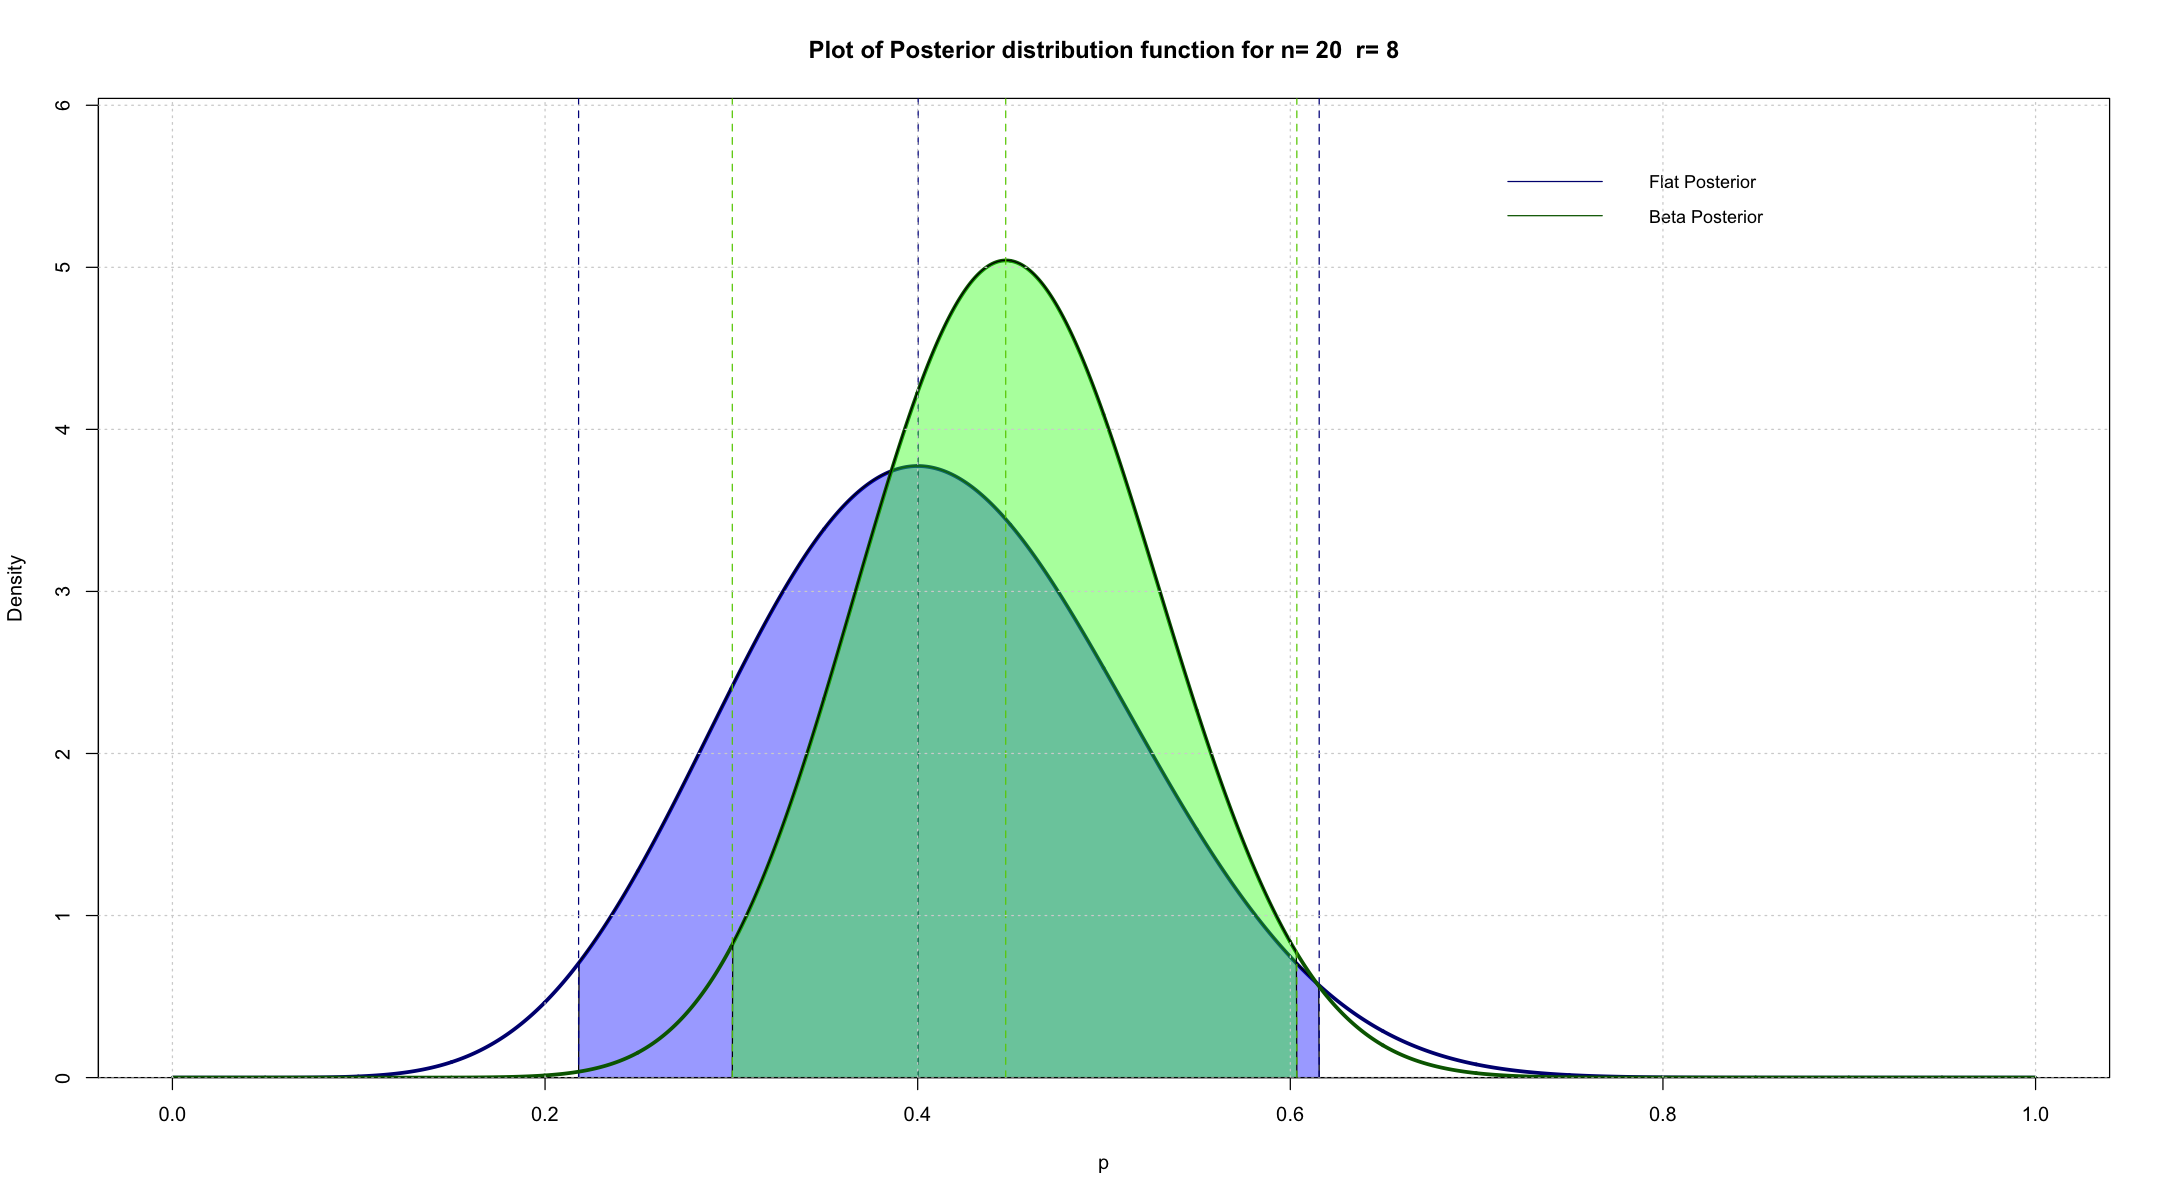

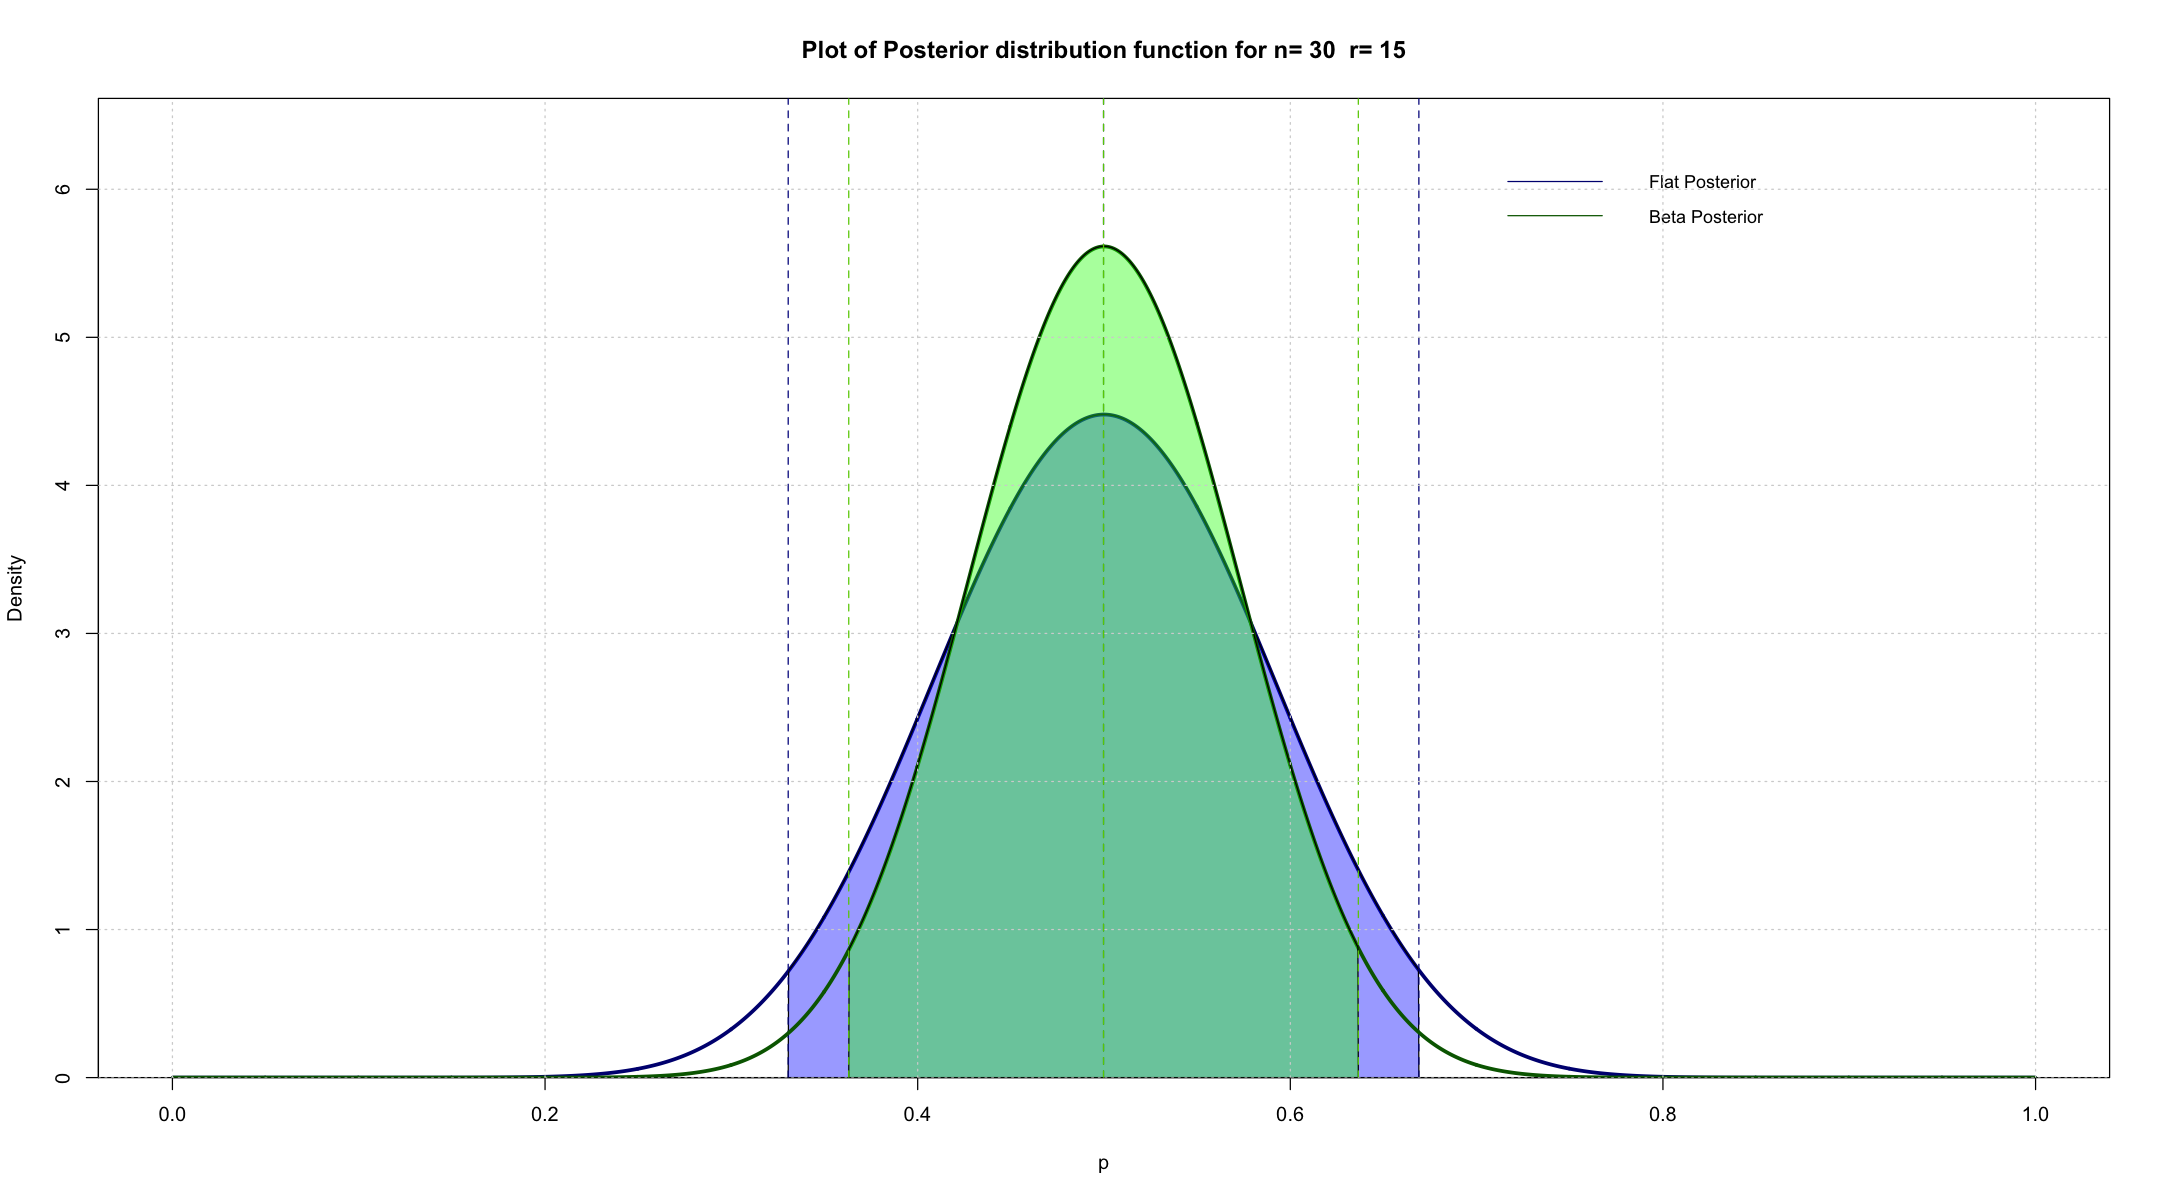

In [23]:
# Vector of outcomes
out <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 
              'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')

n <- length(out)
it <- 1:n

n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 

n.seq <- c(NULL)
r.seq <- c(NULL)
flat.prior.seq <- 1
beta.prior.seq <- 1
max.flat.seq <- c(NULL)
max.beta.seq <- c(NULL)
x1.flat.seq <- c(NULL)
x2.flat.seq <- c(NULL)
x1.beta.seq <- c(NULL)
x2.beta.seq <- c(NULL)

for (i in it){
        
        out.it <- out[1:i]
        n.it <- length(out.it)    
        r.it <- length(out.it[out.it == 'H']) # Number of heads 
        r <- ifelse(out[i]=='H',1, 0) 
        
        n.seq <- c(n.seq,n.it)
        r.seq <- c(r.seq,r.it)

        # Flat Prior
        flat.prior <- flat.prior.seq*dunif(x=p)
                
        # Beta Prior
        alpha <- 10
        beta <- 10
        beta.prior <- beta.prior.seq*dbeta(x=p, alpha, beta)
        
        # Compute the Posterior for Flat Prior
        p.star <- dbinom(x=r, size=1, prob=p)*flat.prior
        flat.post <- p.star/(delta.p*sum(p.star))
        
        flat.prior.seq <- flat.post
    
        # Compute the Posterior for Beta Prior 
        beta.post <- dbeta(x=p, alpha+r.it, beta+n.it-r.it)

        beta.prior.seq <- beta.post
    
        # Give an estimate of the most probable value of the Posterior
        max.flat  <- p[which.max(flat.post)]
        max.beta <- p[which.max(beta.post)]
    
        max.flat.seq <- c(max.flat.seq,max.flat)
        max.beta.seq <- c(max.beta.seq,max.beta)
    
        # Give an estimate of 95% credibility interval
        flat.area <- delta.p*cumsum(flat.post)
        beta.area <- delta.p*cumsum(beta.post)

        cl = 0.95 # Confidence level

        cl.func <- function(p,cumsum.area,cl) {
                    for(i in 1:(length(cumsum.area)-1)){
                        cl1 <- (1-cl)/2
                        cl2 <- cl+(1-cl)/2
                        if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                            x1 <- (p[i]+p[i+1])/2
                        }
                        if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                            x2 <- (p[i]+p[i+1])/2
                        }            
                    }
                    return(c(x1,x2))
                   }

        x.flat <- cl.func(p,flat.area,cl)
        x.beta <- cl.func(p,beta.area,cl)
        
        x1.flat.seq <- c(x1.flat.seq,x.flat[1])
        x2.flat.seq <- c(x2.flat.seq,x.flat[2])
        x1.beta.seq <- c(x1.beta.seq,x.beta[1])
        x2.beta.seq <- c(x2.beta.seq,x.beta[2])
    
    
        if(i%%10==0){       
            # set the size and position of the plots
            par(mfrow=c(1,1))
            options(repr.plot.width=18, repr.plot.height=10)

            # Flat Posterior
            plot(p, flat.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta.post)+1),
                 main = paste("Plot of Posterior distribution function for n=", n.it, " r=", r.it), lty=1, lwd = 3, xlab="p", 
                 ylab='Density')
            #legend("topright", inset=0.05,legend=c("Flat Prior"), col=c("navy"), lty=1, cex=0.9,box.lty=0)

            x <- c(x.flat[1],p[p>x.flat[1] & p<x.flat[2]],x.flat[2])
            y <- c(0,flat.post[which(p>x.flat[1] & p<x.flat[2])],0)
            polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

            abline(v=max.flat, lty=2,col='blue4')
            abline(v=x.flat[1], lty=2,col='blue4')
            abline(v=x.flat[2], lty=2,col='blue4')
            
            # Beta Posterior
            lines(p, beta.post, xaxs='r', yaxs='i', col='darkgreen', type='l', 
                  lty=1, lwd = 3, xlab="p", ylab='Density')
            
            legend("topright", inset=0.05,legend=c("Flat Posterior","Beta Posterior"), col=c("navy","darkgreen"), lty=1:1, cex=0.9,box.lty=0)

            x <- c(x.beta[1],p[p>x.beta[1] & p<x.beta[2]],x.beta[2])
            y <- c(0,beta.post[which(p>x.beta[1] & p<x.beta[2])],0)
            polygon(x = x, y = y, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

            abline(v=max.beta, lty=2,col='chartreuse3')
            abline(v=x.beta[1], lty=2,col='chartreuse3')
            abline(v=x.beta[2], lty=2,col='chartreuse3')

            grid()   
            
        }
}


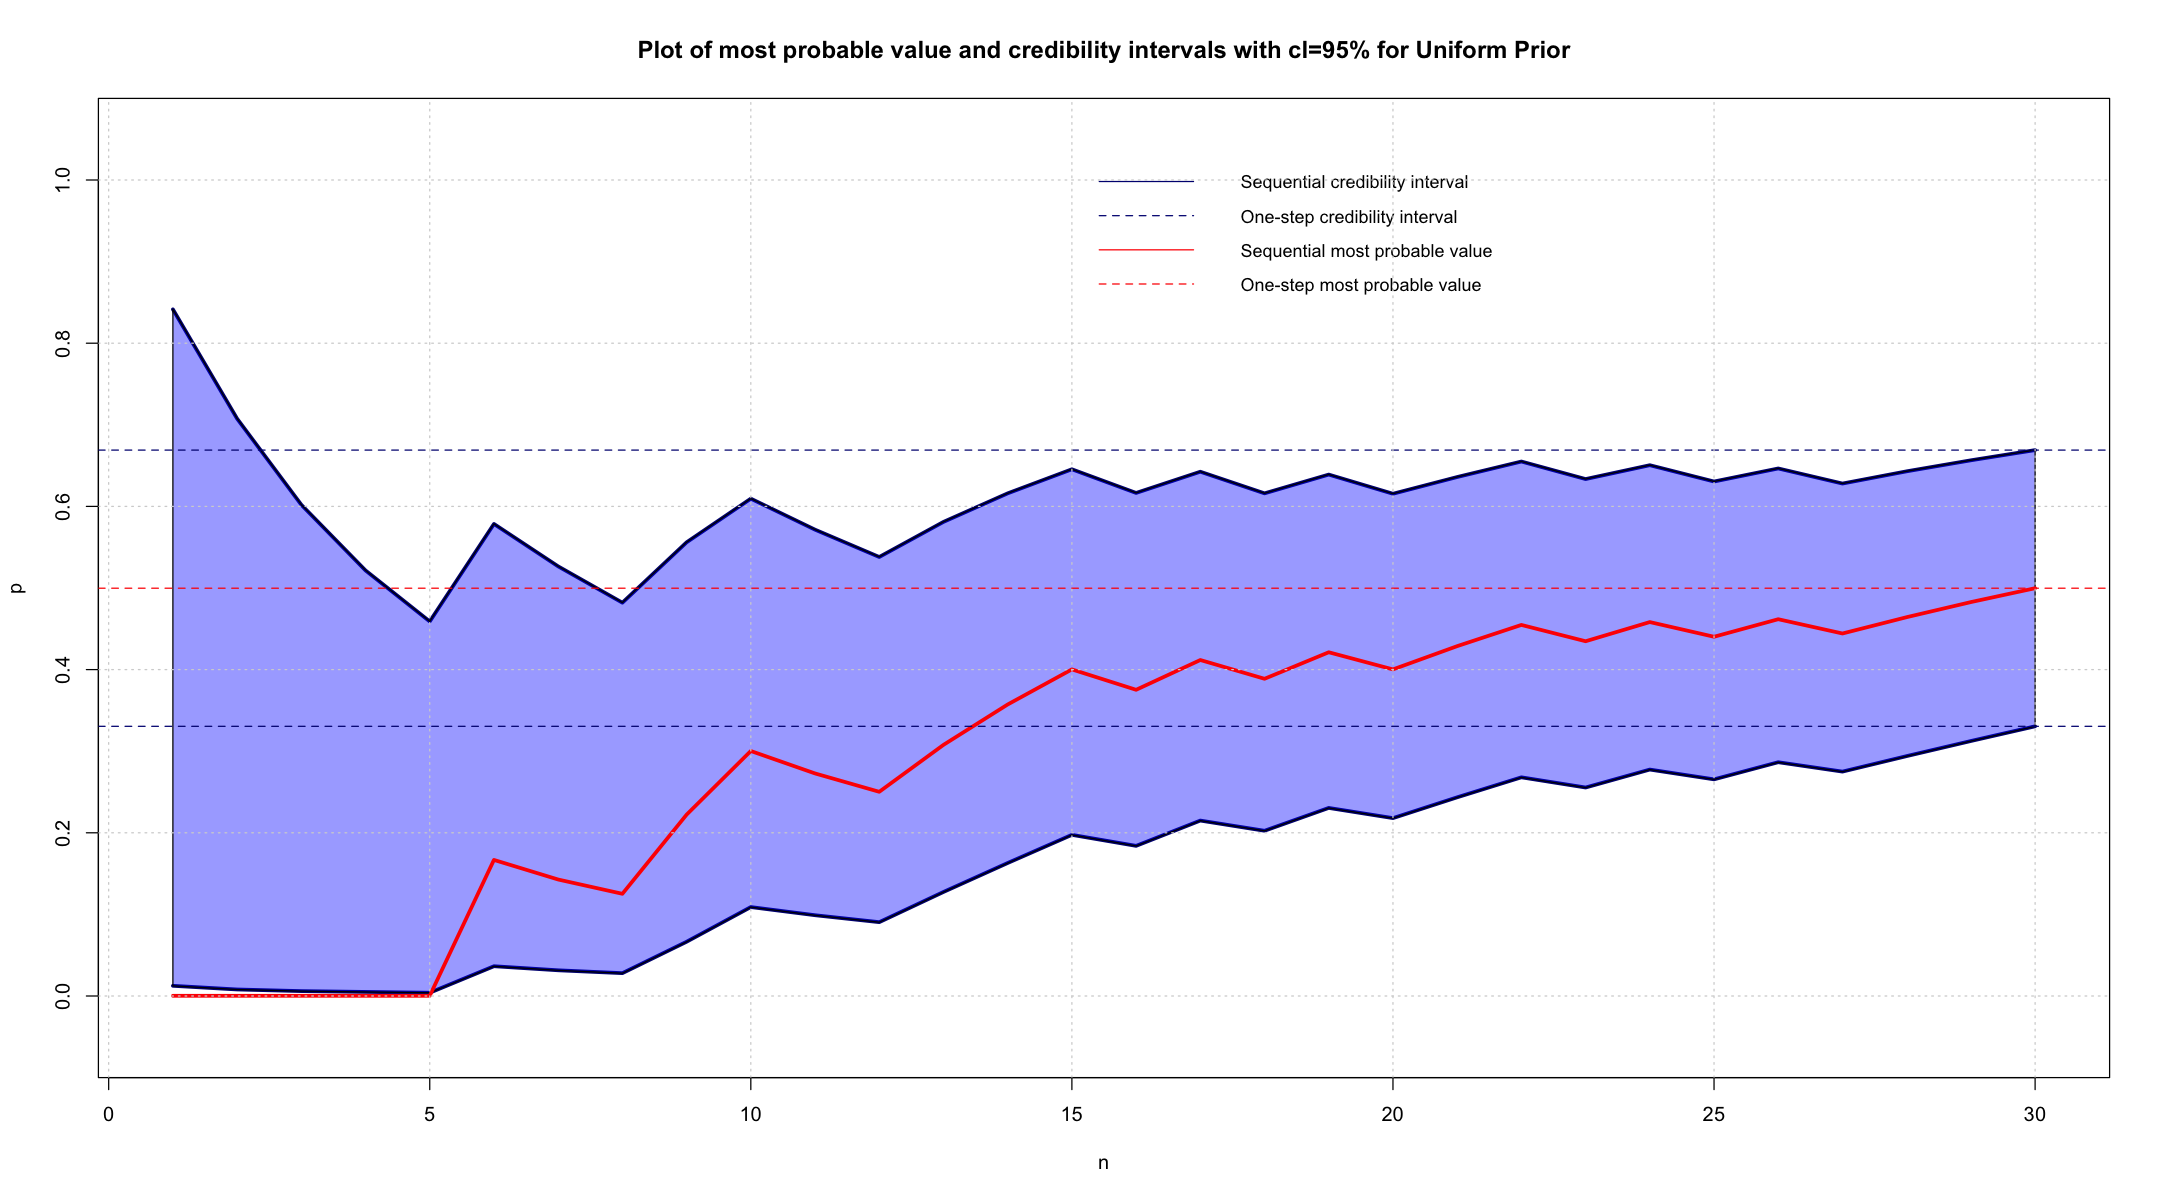

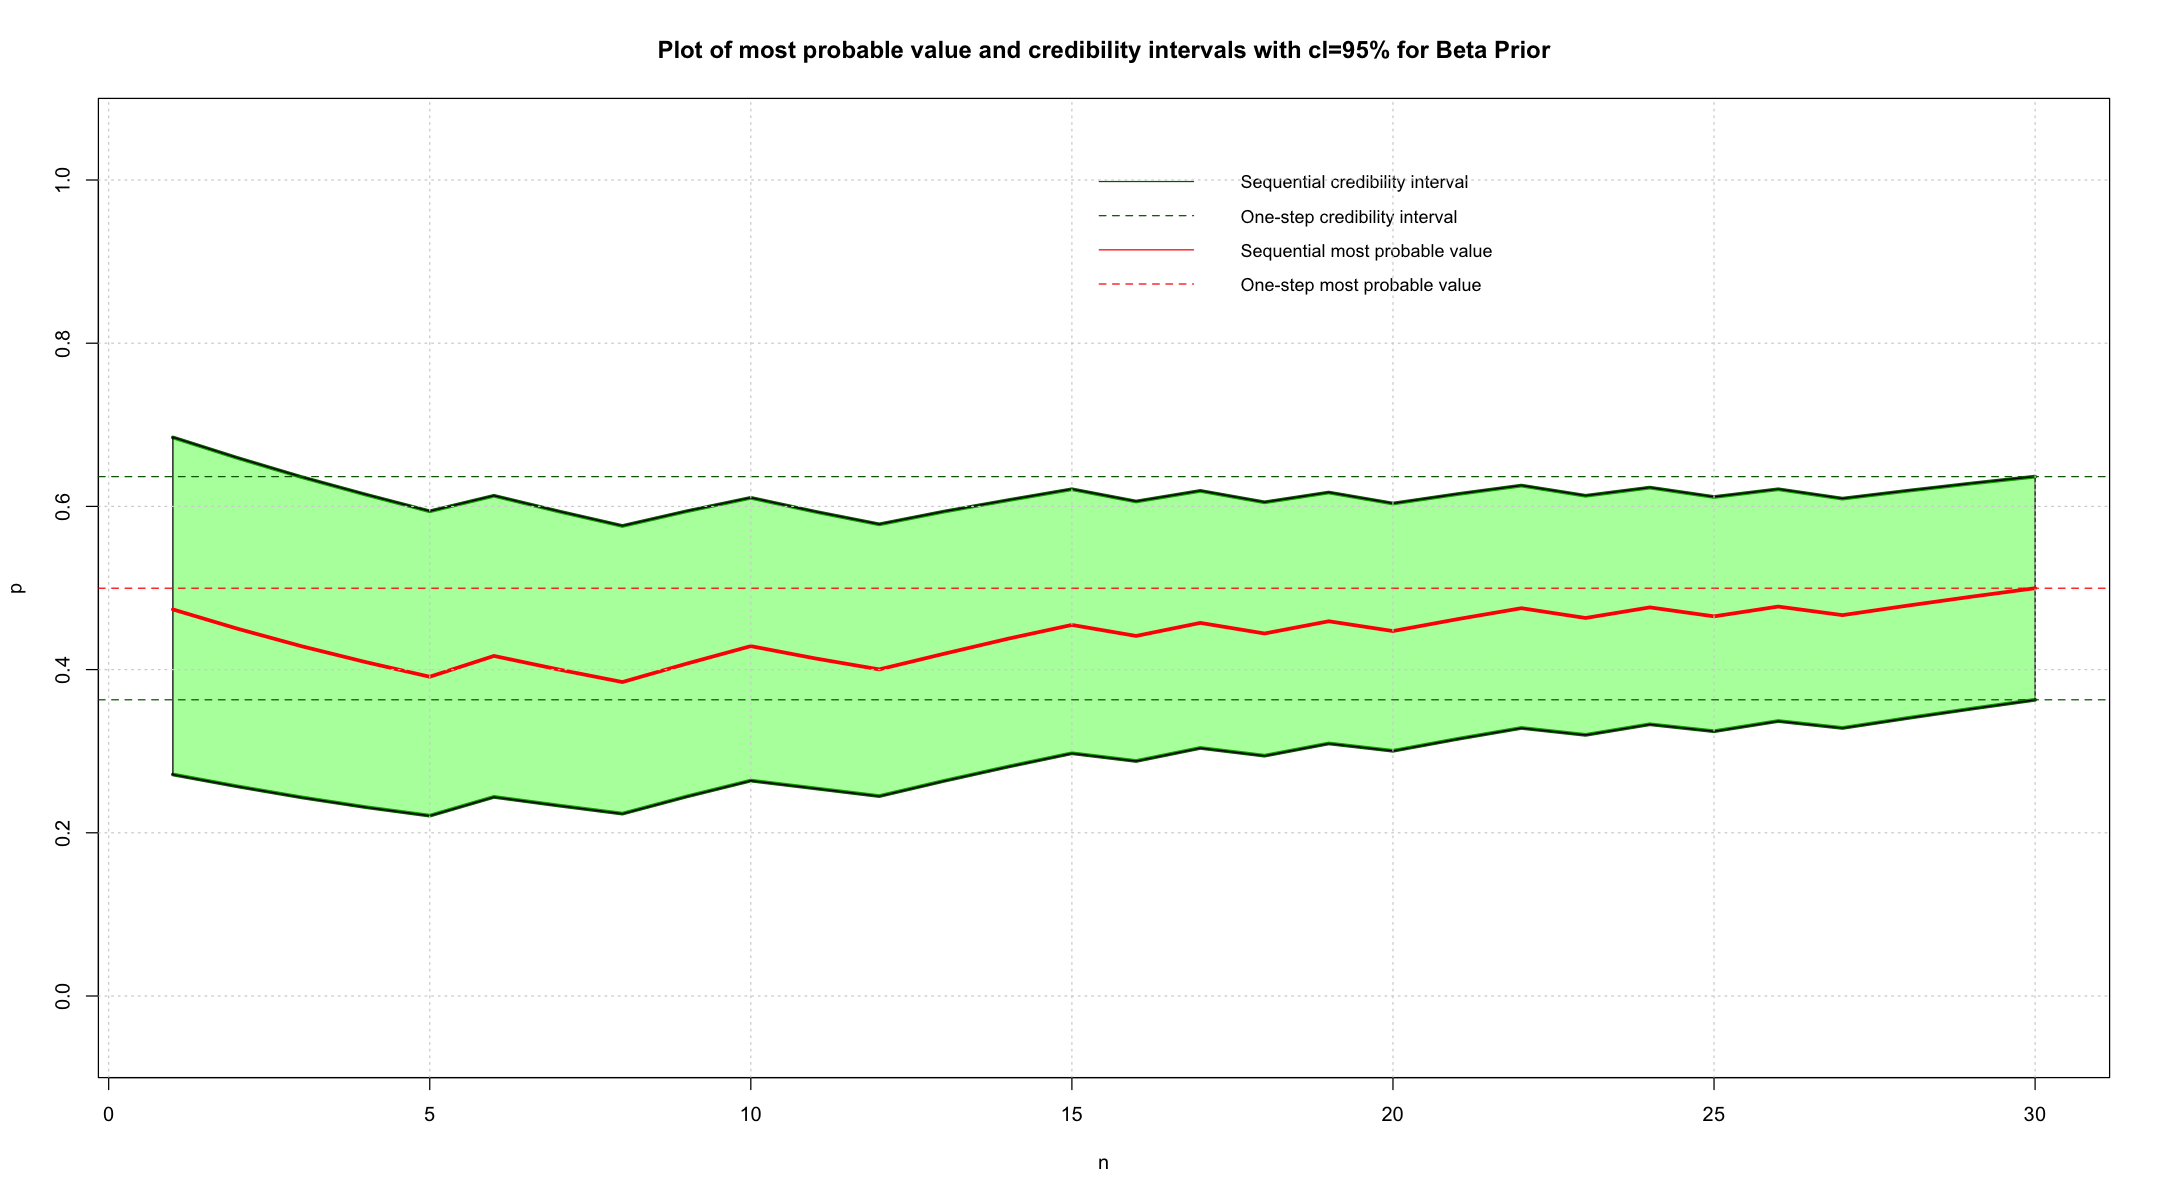

In [24]:
# set the size and position of the plots
par(mfrow=c(1,1))
options(repr.plot.width=18, repr.plot.height=10)

# Flat Prior
plot(n.seq, x1.flat.seq, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(-0.1,1.1),
     main = paste("Plot of most probable value and credibility intervals with cl=95% for Uniform Prior"), lty=1, lwd = 3, xlab="n", 
     ylab='p')

lines(n.seq, x2.flat.seq, xaxs='r', yaxs='i', col='navy', type='l',lty=1, lwd = 3)

x <- c(1,n.seq,30,rev(n.seq),1)
y <- c(x1.flat.seq[1],x2.flat.seq, x1.flat.seq[length(x1.flat.seq)],rev(x1.flat.seq),x1.flat.seq[1])
polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

lines(n.seq, max.flat.seq, xaxs='r', yaxs='i', col='red', type='l', lty=1, lwd = 3)

abline(h=max.flat, lty=2,col='red')
abline(h=x.flat[1], lty=2,col='navy')
abline(h=x.flat[2], lty=2,col='navy')

legend("topright", inset=0.05,
       legend=c("Sequential credibility interval","One-step credibility interval","Sequential most probable value","One-step most probable value"), 
       col=c("navy","navy","red","red"), lty=1:2, cex=0.9,box.lty=0)
grid()

# Beta Prior
plot(n.seq, x1.beta.seq, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(-0.1,1.1),
     main = paste("Plot of most probable value and credibility intervals with cl=95% for Beta Prior"), lty=1, lwd = 3, xlab="n", 
     ylab='p')

lines(n.seq, x2.beta.seq, xaxs='r', yaxs='i', col='darkgreen', type='l', lty=1, lwd = 3)

x <- c(1,n.seq,30,rev(n.seq),1)
y <- c(x1.beta.seq[1],x2.beta.seq, x1.beta.seq[length(x1.beta.seq)],rev(x1.beta.seq),x1.beta.seq[1])
polygon(x = x, y = y, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))


lines(n.seq, max.beta.seq, xaxs='r', yaxs='i', col='red', type='l', lty=1, lwd = 3)

abline(h=max.beta, lty=2,col='red')
abline(h=x.beta[1], lty=2,col='darkgreen')
abline(h=x.beta[2], lty=2,col='darkgreen')

legend("topright", inset=0.05,
       legend=c("Sequential credibility interval","One-step credibility interval","Sequential most probable value","One-step most probable value"), 
       col=c("darkgreen","darkgreen","red","red"), lty=1:2, cex=0.9,box.lty=0)
grid()

### Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

With the two methods we get the same result as expected, because each coss of a coin is independent from the other.